# A Comparative Study of Closed Issues in TensorFlow and PyTorch Frameworks
## Importing Data

In [103]:
#Data Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#For NLP
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
import nltk 
warnings.filterwarnings('ignore')
%matplotlib inline

In [104]:
TF_path = "./Data/uncleanedData/Tensorflow_issues.csv"
PT_path = "./Data/uncleanedData/PyTorch_issues.csv"

TF_df   = pd.read_csv(TF_path)
PT_df   = pd.read_csv(PT_path)

In [105]:
TF_df 

,Issue Number,Issue Title,Time to Close,Number of Assignees,Number of Comments,Number of Labels,Type of Issue
0,59463,Unable to build 2.11 for ppc64le due to XNNPAC...,0,1,4,1,['Other']
1,59454,Val loss is very different from training loss ...,0,1,3,3,['Bug']
2,59432,How to infer pose classification on single im...,2,1,2,3,['Other']
3,59408,CUDA launch failure when running tensorflow.py...,0,1,1,1,['Bug']
4,59375,IA capable de lire des chiffre,0,1,0,0,['Other']
...,...,...,...,...,...,...,...
4657,47759,Cuda version should be 11 instead of 10 in Ins...,12,1,3,3,['Bug']
4658,47758,estimator guide page doesn't work!,7,1,1,3,['Bug']
4659,47757,Getting issues while evaluting the object dete...,5,1,3,3,['Other']
4660,47756,Some of the operators in the model are not sup...,0,1,6,5,['Bug']


In [106]:
PT_df

,Issue Number,Issue Title,Time to Close,Number of Assignees,Number of Comments,Number of Labels,Type of Issue
0,93148,No matching distribution found for torch on py...,0,0,2,0,['Other']
1,93068,Unexpected keyword argument during model compi...,0,0,1,1,['Other']
2,93058,why doe torch.inference_mode() requires 'with'...,0,0,2,0,['Other']
3,93054,DISABLED test_roi_align_dynamic_shapes_cuda (_...,0,0,9,3,['Other']
4,93028,`torch.fft.ifft` has different jacobians compu...,0,0,2,0,['Other']
...,...,...,...,...,...,...,...
4239,65659,/opt/conda/conda-bld/pytorch_1631630806732/wor...,1,0,2,0,['Other']
4240,65656,Layernormal seems only support torch.float32 。,2,0,2,0,['Other']
4241,65652,[Pytorch Tensorboard] torch.utils.tensorboard ...,25,0,3,1,['Other']
4242,65651,Why official released torch whl doesn't contai...,1,0,2,0,['Other']


### 0 - Defining the Purpose of the Notebook (Problem and Motivation)
#### **Motivation**
##### The motivation for a comparative study of closed issues in TensorFlow and PyTorch frameworks is to understand the similarities and differences between the two popular deep learning libraries. This study aims to evaluate the bug fixing process and performance of each framework by analyzing key metrics such as the number of closed issues, the time taken to close an issue, and the types of issues encountered. The results of this study can provide valuable insights for developers and researchers in the field of deep learning and assist in choosing the right framework for their specific needs.

#### **The Features** 
##### **1.Time to close**: This metric measures the time elapsed between the issue creation and the issue closure. This metric can give an indication of how quickly the issue was addressed, and also help to identify if there are any delays in addressing certain types of issues.
##### **2. Number of assignees**: This metric measures the number of people assigned to an issue. This metric can give an indication of how many people were involved in addressing the issue, and also help to identify if there are any differences in the number of people assigned to different types of issues.
##### **3. Number of comments**: This metric measures the number of comments on an issue. This metric can give an indication of how much discussion and collaboration was required to fix the issue, and also help to identify if there are any differences in the number of comments for different types of issues.
##### **4. Number of labels**: This metric measures the number of labels associated with an issue. This metric can give an indication of how many different aspects of the issue were addressed, and also help to identify if there are any differences in the number of labels for different types of issues.
##### **5. Type of issue**: This metric measures the type of issue, whether it is labeled as a bug, a feature request, an enhancement, etc. This metric can give an indication of the nature of the issue, and also help to identify if there are any differences in the types of issues that are reported. More analysis are discussed in the notebook later. 

##### **Number of reviews** can be added as an indication for the level of testing, review and validation of the solution for the bug. However, because pyGithub does not have the feature of returning the number of reviewers of closed issues that are not pull-request. 



## 1. Data Exploration 

In [107]:
def ExploringTheData(df):
    '''
    Args: 
        df: The Dataframe
    Returns:
        None
    '''
    # print("The Shape: ",df.shape)
    print("Simple Description of The Data: ", df.describe().T)
    print("The Number of Duplicate Data:",df.duplicated().sum())
    print("Check the Null values for each feature")
    print("Feature Name:      Value")
    print(df.isnull().sum())


In [108]:
ExploringTheData(TF_df)

Simple Description of The Data:                        count          mean          std      min       25%  \
Issue Number         4662.0  53195.140927  3353.450954  47755.0  50413.25   
Time to Close        4662.0     40.533248    87.195434      0.0      3.00   
Number of Assignees  4662.0      1.132776     0.449752      0.0      1.00   
Number of Comments   4662.0      5.962462     4.417895      0.0      3.00   
Number of Labels     4662.0      3.885457     1.251374      0.0      3.00   

                         50%       75%      max  
Issue Number         53059.0  56240.75  59463.0  
Time to Close           14.0     25.00    667.0  
Number of Assignees      1.0      1.00      7.0  
Number of Comments       5.0      7.00     51.0  
Number of Labels         4.0      5.00      7.0  
The Number of Duplicate Data: 0
Check the Null values for each feature
Feature Name:      Value
Issue Number           0
Issue Title            0
Time to Close          0
Number of Assignees    0
Number o

In [109]:
ExploringTheData(PT_df)

Simple Description of The Data:                        count          mean          std      min      25%  \
Issue Number         4244.0  79057.313148  7964.309838  65648.0  72412.0   
Time to Close        4244.0     38.862158    71.006661      0.0      0.0   
Number of Assignees  4244.0      0.262724     0.484028      0.0      0.0   
Number of Comments   4244.0      3.232799     4.178664      0.0      1.0   
Number of Labels     4244.0      2.508011     1.550070      0.0      2.0   

                         50%       75%      max  
Issue Number         78835.0  85696.25  93148.0  
Time to Close            6.0     43.00    454.0  
Number of Assignees      0.0      0.00      6.0  
Number of Comments       2.0      4.00     60.0  
Number of Labels         3.0      3.00      9.0  
The Number of Duplicate Data: 0
Check the Null values for each feature
Feature Name:      Value
Issue Number           0
Issue Title            0
Time to Close          0
Number of Assignees    0
Number of Comm

## 2. Preprocessing the Data and Feature Engineering

### 2.1 Feature Engineering on the Type Of Issue

In [110]:
# Feature Engineering to the labels feature to "The type of the issue and the priority issue."

def TypeOfIssueFeatureEngineering(df):
    '''
    Args: 
        df: The Dataframe
    Returns:
        df: The Dataframe after modifying the Type of Issue feature
    '''
    priority = ['Minor', 'Critical', 'critical']
    type     = ['Bug', 'Question', 'Documentation', 'enhancement', 'Other']
    df['Type of Issue'] = df['Type of Issue'].apply(lambda x: x.replace('[', '').replace(']', '').replace("'", '').split(','))
    df['Type'] = df['Type of Issue'].apply(lambda x: [i for i in x if i in type])
    df['Priority'] = df['Type of Issue'].apply(lambda x: [i for i in x if i in priority])

    #If df[type] is empty, then the type of the issue is "Other"
    df['Type'] = df['Type'].apply(lambda x: 'Other' if len(x) == 0 else x[0])
    #If df[priority] is empty, then the priority of the issue is "Normal"
    df['Priority'] = df['Priority'].apply(lambda x: 'Normal' if len(x) == 0 else x[0])
    #make type and priority as strings instead of list
    df['Type'] = df['Type'].apply(lambda x: x.replace('[', '').replace(']', '').replace("'", ''))
    df['Priority'] = df['Priority'].apply(lambda x: x.replace('[', '').replace(']', '').replace("'", ''))
    #drop the Type of Issue column
    df.drop('Type of Issue', axis=1, inplace=True)
    return df


In [111]:
TF_df = TypeOfIssueFeatureEngineering(TF_df)
PT_df = TypeOfIssueFeatureEngineering(PT_df)

### 2.2 Mapping the Type and Priority to Numbers for Visualization

In [112]:
#Map the Type feature to the numbers
TF_df['Type'] = TF_df['Type'].map({'Bug': 0, 'Question': 1, 'Documentation': 2, 'enhancement': 3, 'Other': 4})
PT_df['Type'] = PT_df['Type'].map({'Bug': 0, 'Question': 1, 'Documentation': 2, 'enhancement': 3, 'Other': 4})

#Map the Priority feature to the numbers
TF_df['Priority'] = TF_df['Priority'].map({'Normal': 0, 'Minor': 1, 'Critical': 2, 'critical': 3})
PT_df['Priority'] = PT_df['Priority'].map({'Normal': 0, 'Minor': 1, 'Critical': 2, 'critical': 3})

#Mapper To the type 
TypeMapper = {0: 'Bug', 1: 'Question', 2: 'Documentation', 3: 'enhancement', 4: 'Other'}
#Mapper To the priority
PriorityMapper = {0: 'Normal', 1: 'Minor', 2: 'Critical', 3: 'critical'}


### 2.3 Deleteing any Issues related to ReadMe

In [113]:
#Deleting all the rows that have the a substring of "readme" in the issue title
def DeleteReadme(df):
    '''
    Args: 
        df: The Dataframe
    Returns:
        df: The Dataframe after deleting the rows that have the a substring of "readme" in the issue title
    '''
    df = df[~df['Issue Title'].str.contains("readme")]
    df = df[~df['Issue Title'].str.contains("Readme")]
    return df

In [114]:
TF_df = DeleteReadme(TF_df)
PT_df = DeleteReadme(PT_df)

### 2.4 Data Mining on Issue Title

"Doing Clustering on this column to check whether the issues are various or not. Clustering the data in this column will allow for an examination of the diversity of issues. While it is not a primary metric in my analysis, it may provide valuable insights."

In [115]:
# Feature Engineering to the Issue Title to see how topics are close to each other 
# and how many topics are there in the data.

#Check the maximum length to the issue title
def MaxLengthOfIssueTitle(df, FrameWorkName):
    '''
    Args: 
        df: The Dataframe
    Returns:
        None
    '''
    print("The maximum length of the issue title in", FrameWorkName, "is:", df['Issue Title'].apply(lambda x: len(x)).max())

MaxLengthOfIssueTitle(TF_df, "Tensorflow")
MaxLengthOfIssueTitle(PT_df, "PyTorch")

The maximum length of the issue title in Tensorflow is: 785
The maximum length of the issue title in PyTorch is: 669


In [116]:
#I want to preprocess the whole issue title to see how many topics are there in the data
def PreprocessIssueTitle(df):
    '''
    Args: 
        df: The Dataframe
    Returns:
        df: The Dataframe after preprocessing the issue title
    '''
    #Remove the punctuation
    df['preprocessed Title'] = df['Issue Title'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
    #Make all the letters to lower case
    df['preprocessed Title'] = df['preprocessed Title'].apply(lambda x: x.lower())
    #Remove the stopwords
    df['preprocessed Title'] = df['preprocessed Title'].apply(lambda x: x.split())
    df['preprocessed Title'] = df['preprocessed Title'].apply(lambda x: [word for word in x if not word in set(stopwords.words('english'))])
    #Stemming
    ps = PorterStemmer()
    df['preprocessed Title'] = df['preprocessed Title'].apply(lambda x: [ps.stem(word) for word in x])
    df['preprocessed Title'] = df['preprocessed Title'].apply(lambda x: ' '.join(x))
    return df
    

In [117]:
TF_df = PreprocessIssueTitle(TF_df)
PT_df = PreprocessIssueTitle(PT_df)

<b> There are approaches for preprocessing the data, such as bags of words with TFIDF or BM25, wordEmbedding, and pre-trained Models. </b>

#### 2.4.1 Word Embedding using Pre-Trained Model

In [118]:
from sentence_transformers import  SentenceTransformer
model = SentenceTransformer('sentence-transformers/msmarco-MiniLM-L6-cos-v5')

In [119]:
TF_df["Issue Title Embeddings"] = TF_df["preprocessed Title"].apply(lambda x: model.encode(x))

In [120]:
PT_df["Issue Title Embeddings"] = PT_df["preprocessed Title"].apply(lambda x: model.encode(x))

In [121]:
#convert TF_df['Issue_Title_Embeddings'] to a list
Issue_Title_Embedding = TF_df['Issue Title Embeddings'].tolist()
#Convert this list with a dataframe having len(Issue_Title_Embedding) rows and 384 columns
Issue_Title_Embedding = pd.DataFrame(Issue_Title_Embedding)
#Rename the columns
Issue_Title_Embedding.columns = ['Issue Title Embedding ' + str(col) for col in Issue_Title_Embedding.columns]
#Concatenate the Issue_Title_Embedding with the TF_df
TF_Issue_Title_Embedding = Issue_Title_Embedding


#convert PT_df['Issue_Title_Embeddings'] to a list
Issue_Title_Embedding = PT_df['Issue Title Embeddings'].tolist()
#Convert this list with a dataframe having len(Issue_Title_Embedding) rows and 384 columns
Issue_Title_Embedding = pd.DataFrame(Issue_Title_Embedding)
#Rename the columns
Issue_Title_Embedding.columns = ['Issue Title Embedding ' + str(col) for col in Issue_Title_Embedding.columns]
#Concatenate the Issue_Title_Embedding with the PT_df
PT_Issue_Title_Embedding = Issue_Title_Embedding

#### 2.4.2 Word Embedding with BM25

In [122]:
#Using BM25 to convert the issue title 
from rank_bm25 import BM25Okapi
#Convert the preprocessed title to a list of lists
preprocessed_title = TF_df['preprocessed Title'].tolist()

for i in range(len(preprocessed_title)):
    preprocessed_title[i] = preprocessed_title[i].split()

#Create the BM25 object
bm25 = BM25Okapi(preprocessed_title)

#Get the BM25 scores for each preprocessing title
TF_BM25 =[bm25.get_scores(preprocessed_title[i]) for i in range(len(preprocessed_title))]


#Convert the preprocessed title to a list
preprocessed_title = PT_df['preprocessed Title'].tolist()

for i in range(len(preprocessed_title)):
    preprocessed_title[i] = preprocessed_title[i].split()

#Create the BM25 object
bm25 = BM25Okapi(preprocessed_title)
PT_BM25 =[bm25.get_scores(preprocessed_title[i]) for i in range(len(preprocessed_title))]

## 3. Data Visualization

### 3.1 Understanding the distribution of each Metric in both FrameWork

In [123]:
def GeneratePlots(df1, df2, FrameWorkName1, FrameWorkName2, FeatureName):
    '''
    Args: 
        df1: The Dataframe1
        df2: The Dataframe2
        FrameWorkName1: The name of the first framework
        FrameWorkName2: The name of the second framework
        FeatureName: The name of the feature that we want to compare between the two frameworks
    Returns:
        None
    '''
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(FeatureName)
    axes[0].set_title(FrameWorkName1)
    axes[1].set_title(FrameWorkName2)
    sns.countplot(x=FeatureName, data=df1, ax=axes[0])
    sns.countplot(x=FeatureName, data=df2, ax=axes[1])

    

#Compare the distribution between two frameworks
def CompareDistributions(df1, df2, FrameWorkName1, FrameWorkName2, FeatureName):
    '''
    Args: 
        df1: The Dataframe1
        df2: The Dataframe2
        FrameWorkName1: The name of the first framework
        FrameWorkName2: The name of the second framework
        FeatureName: The name of the feature that we want to compare between the two frameworks
    Returns:
        None
    '''
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(FeatureName)
    axes[0].set_title(FrameWorkName1)
    axes[1].set_title(FrameWorkName2)
    sns.distplot(df1[FeatureName], ax=axes[0])
    sns.distplot(df2[FeatureName], ax=axes[1])

    

#### 3.1.1 Time To Close Feature

##### 3.1.1.1 Without Removing the Outliers

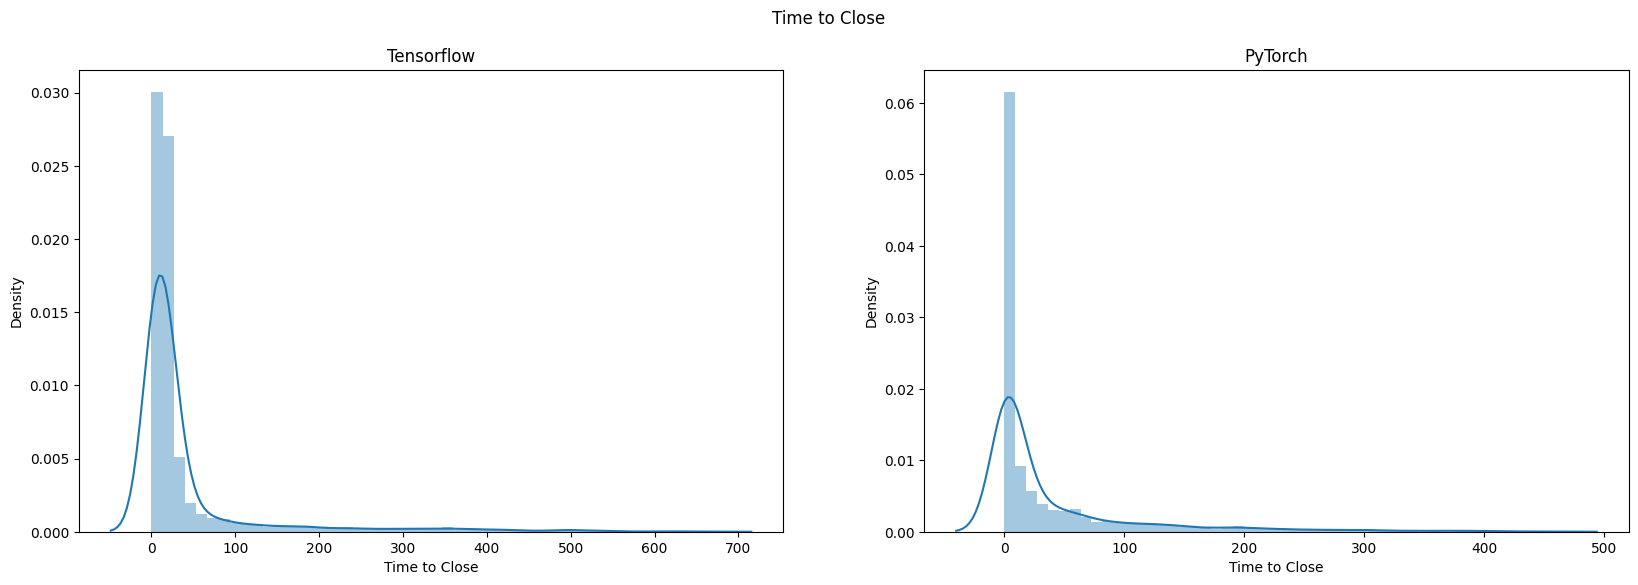

In [124]:
CompareDistributions(TF_df, PT_df, "Tensorflow", "PyTorch", "Time to Close")

##### 3.1.1.2 Examining Outliers and Regular Data Points Independently


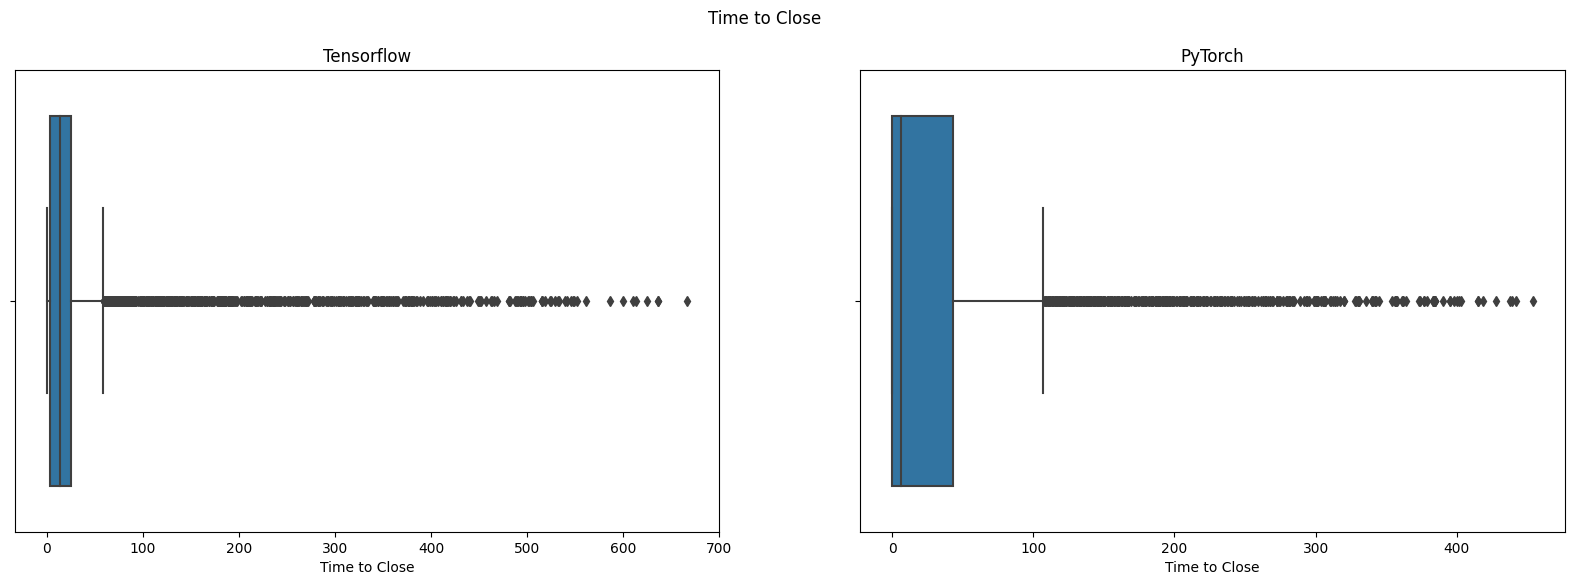

In [125]:
# Check how different they are in Time to Close in terms of Outliners
def CheckOutliners(df1, df2, FrameWorkName1, FrameWorkName2, FeatureName):
    '''
    Args: 
        df1: The Dataframe1
        df2: The Dataframe2
        FrameWorkName1: The name of the first framework
        FrameWorkName2: The name of the second framework
        FeatureName: The name of the feature that we want to compare between the two frameworks
    Returns:
        None
    '''
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(FeatureName)
    axes[0].set_title(FrameWorkName1)
    axes[1].set_title(FrameWorkName2)
    sns.boxplot(x=FeatureName, data=df1, ax=axes[0])
    sns.boxplot(x=FeatureName, data=df2, ax=axes[1])    


CheckOutliners(TF_df, PT_df, "Tensorflow", "PyTorch", "Time to Close")


In [126]:
print("The number of the outliners in", "TensorFlow", "is:", len(TF_df[TF_df["Time to Close"] > 400]))
print("The number of the outliners in", "PyTorch", "is:", len(PT_df[PT_df["Time to Close"] > 400]))


The number of the outliners in TensorFlow is: 80
The number of the outliners in PyTorch is: 10


<pr>Other methods, such as the Local Outlier Factor, can be utilized to detect outliers in the data, as box plots may not be entirely effective in identifying them.</pr>

In [127]:
from sklearn.neighbors import LocalOutlierFactor
def Outliners(df, featureList):
    '''
    Args:
        df: The Dataframe
    Returns:
        df_inlier: The Dataframe of the inliers
        df_outlier: The Dataframe of the outliners
    '''
    colsMahal = featureList
    # fit the model for outlier detection (default)
    clf = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
    # use fit_predict to compute the predicted labels of the training samples
    # (when LOF is used for outlier detection, the estimator has no predict,
    # decision_function and score_samples methods).
    y_pred = clf.fit_predict(df[colsMahal])

    X_scores = clf.negative_outlier_factor_

    in_mask = [True if l == 1 else False for l in y_pred]
    out_mask = [True if l == -1 else False for l in y_pred]
    df_inlier = df[in_mask]
    df_outlier = df[out_mask]
    radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

    return df_inlier, df_outlier

featureList = ['Time to Close']
TF_df_inlier, TF_df_outlier = Outliners(TF_df, featureList)
PT_df_inlier, PT_df_outlier = Outliners(PT_df, featureList)

In [128]:
#The Number of Outlier of the Time to Close in Tensorflow 
print("The number of the outliners in", "TensorFlow", "is:", len(TF_df_outlier))
#The Number of Outlier of the Time to Close in PyTorch
print("The number of the outliners in", "PyTorch", "is:", len(PT_df_outlier))

The number of the outliners in TensorFlow is: 94
The number of the outliners in PyTorch is: 85


<pr>From results above, the data is conistent somehow except a small portion of the data. We can analyze the outliers speretely, as we do not have much number of points in general and we can not afford to lose them.</pr>

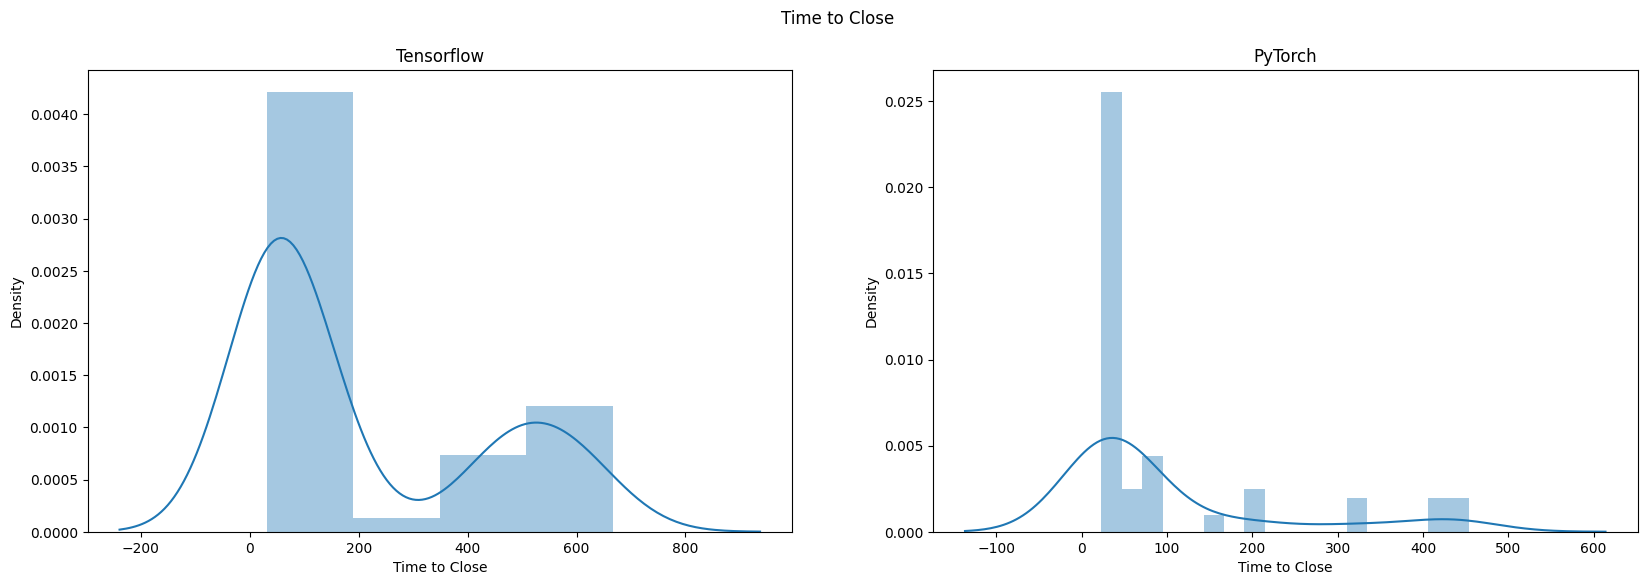

In [129]:
CompareDistributions(TF_df_outlier, PT_df_outlier, "Tensorflow", "PyTorch", "Time to Close")

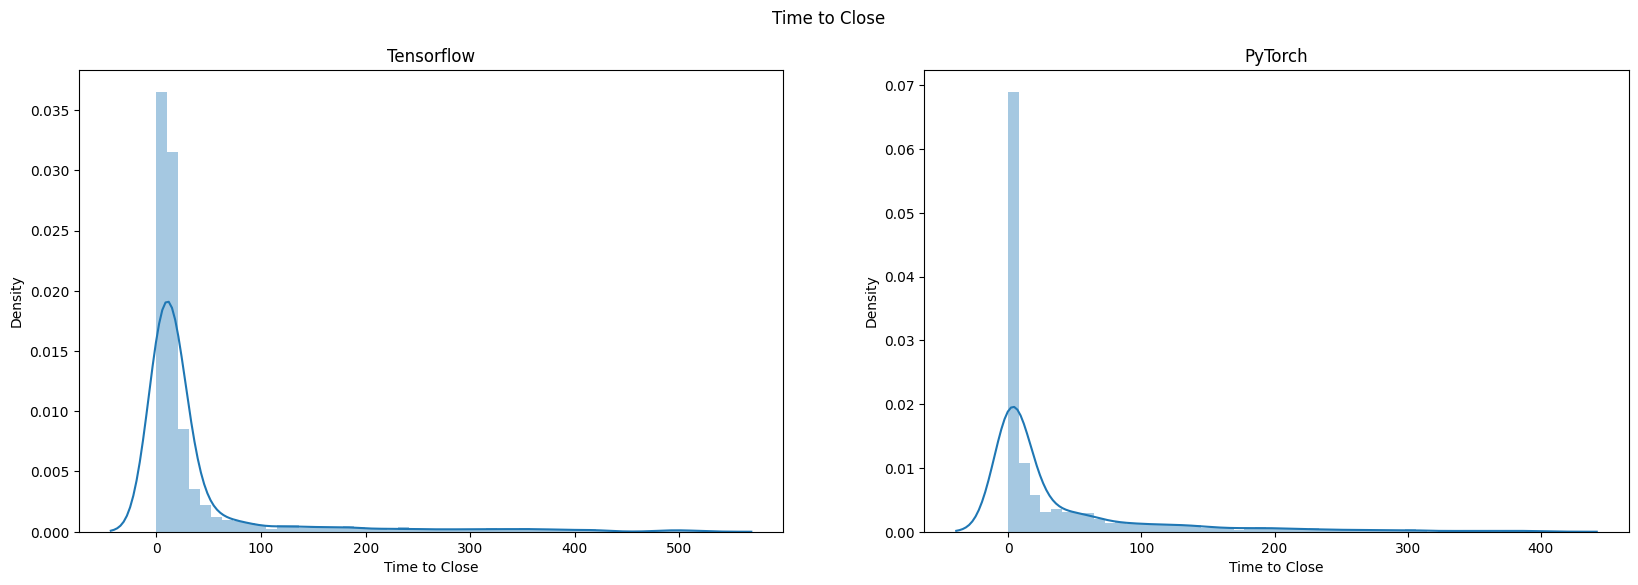

In [130]:
CompareDistributions(TF_df_inlier, PT_df_inlier, "Tensorflow", "PyTorch", "Time to Close")

<h4><strong>Observation 1</strong></h4>

<p><strong>For the Inlier points</strong></p>
<ul>
<li>The distribution plot shows that the majority of issues in PyTorch are closed within a shorter time frame "within a day" compared to TensorFlow. However, the 75th percentile for TensorFlow issues being closed is 25 days, while for PyTorch it is 40 days.</li>
<li>The box plot reveals that there are 10 issues in PyTorch that took over 400 days to be resolved, while TensorFlow had 80 issues that took more than 400 days to close.</li>
<li>From Blox Plot, the majority of closed issues in PyTorch are resolved within 45 days, while the majority of closed issues in TensorFlow are resolved within 10 days on average.</li>
</ul>

<p><strong>For the Outlier points</strong></p>
<ol>
  <li>The majority of outlier of issues of PyTorch to be closed took shorter time compared to tensorFlow.</li>
</ol>

<p>From the <strong>analysis points </strong> above, this data may suggest that a higher proportion of issues in PyTorch are not categorized "bug", or that issues requiring more time to resolve may be more prevalent in PyTorch than in TensorFlow. If so, this concludes that TensorFlow has larger communities compared to pyTorch. Also, the issues related to bugs are for TensorFlow more than PyTorch (The other metrics should prove or disporve this analysis)</p>


###

#### 3.1.2 Number of Assignee

#### 3.1.2.1 Without Removing Outliers

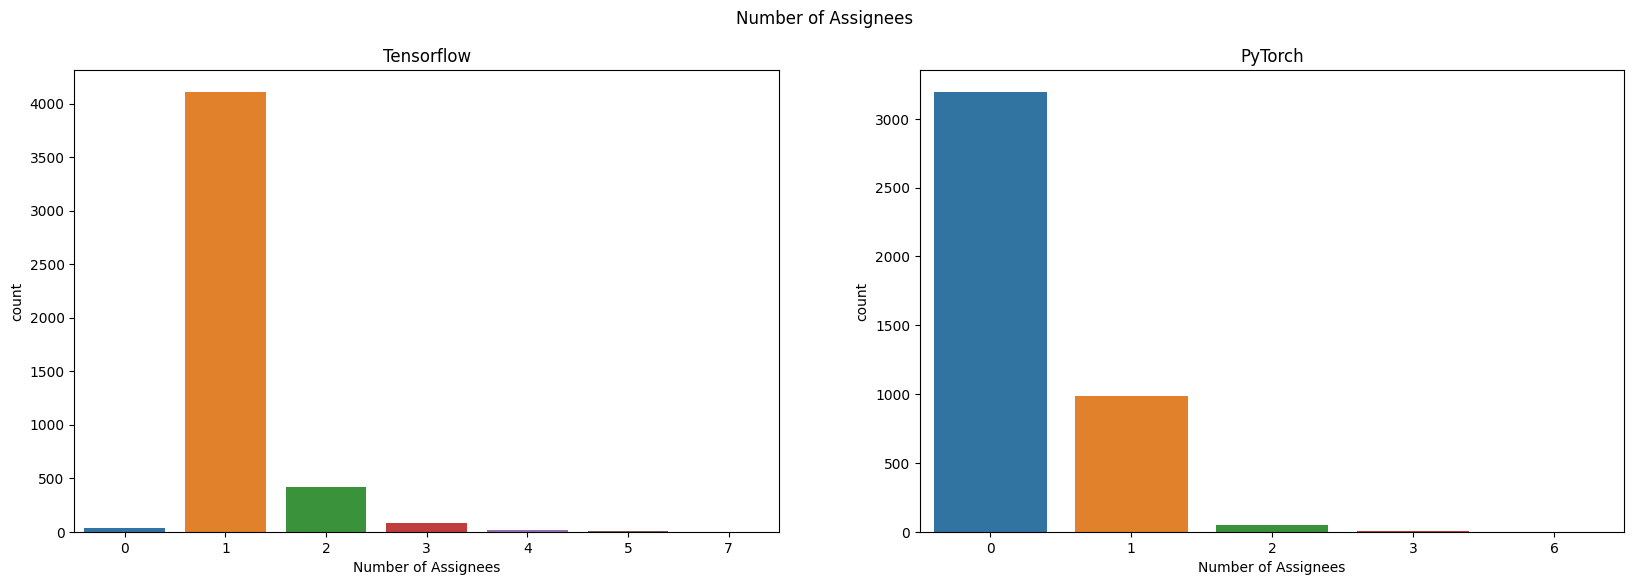

In [131]:
#Generate Plots for both 
GeneratePlots(TF_df, PT_df, "Tensorflow", "PyTorch", "Number of Assignees")

In [132]:
# Plot the Number of Assignees without 0 number of assignees
def GeneratePlotsWithoutZero(df1, df2, FrameWorkName1, FrameWorkName2, FeatureName):
    '''
    Args: 
        df1: The Dataframe1
        df2: The Dataframe2
        FrameWorkName1: The name of the first framework
        FrameWorkName2: The name of the second framework
        FeatureName: The name of the feature that we want to compare between the two frameworks
    Returns:
        None
    '''
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(FeatureName)
    axes[0].set_title(FrameWorkName1)
    axes[1].set_title(FrameWorkName2)
    sns.countplot(x=FeatureName, data=df1[df1[FeatureName] != 0], ax=axes[0])
    sns.countplot(x=FeatureName, data=df2[df2[FeatureName] != 0], ax=axes[1])

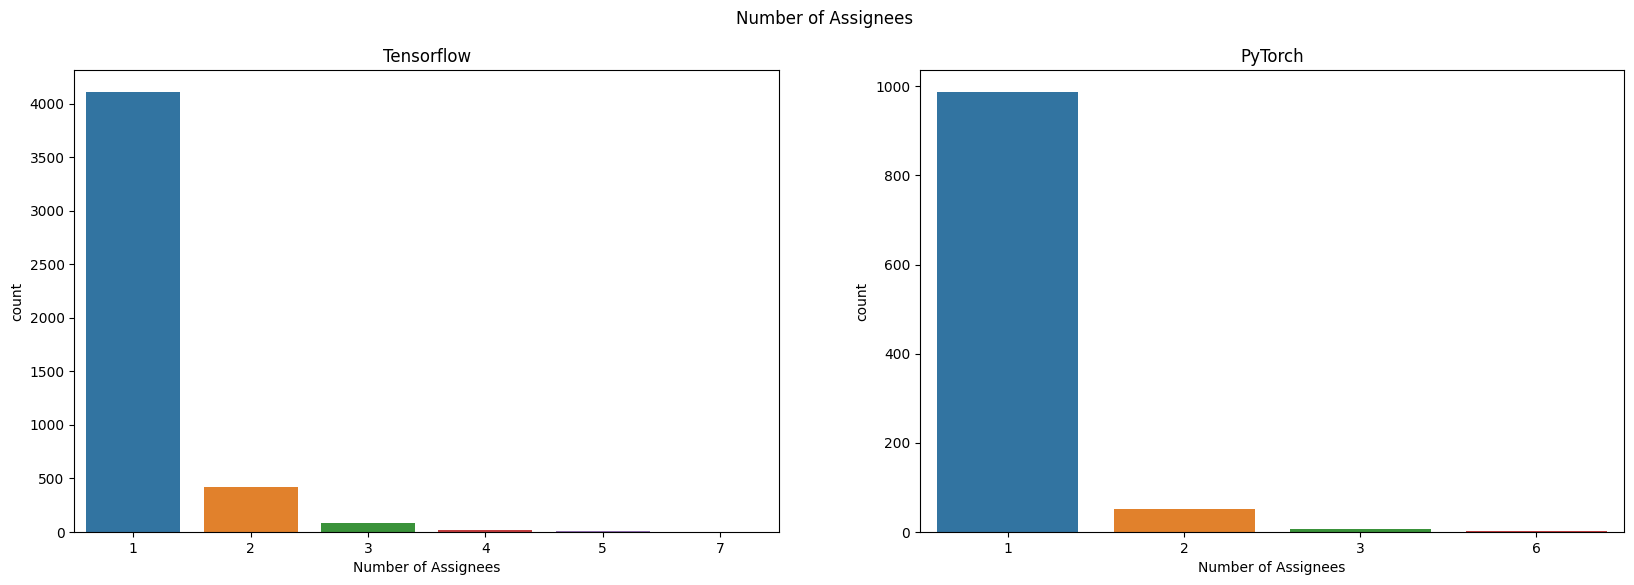

In [133]:
GeneratePlotsWithoutZero(TF_df, PT_df, "Tensorflow", "PyTorch", "Number of Assignees")

#### 3.1.2.2 Examining Outliers and Regular Data Points Independently

In [134]:
featureList = ['Number of Assignees']
TF_df_inlier, TF_df_outlier = Outliners(TF_df, featureList)
PT_df_inlier, PT_df_outlier = Outliners(PT_df, featureList)

In [135]:
#Print the length of the outliners
print("The number of the outliners in", "TensorFlow", "is:", len(TF_df_outlier))
print("The number of the outliners in", "PyTorch", "is:", len(PT_df_outlier))

The number of the outliners in TensorFlow is: 17
The number of the outliners in PyTorch is: 8


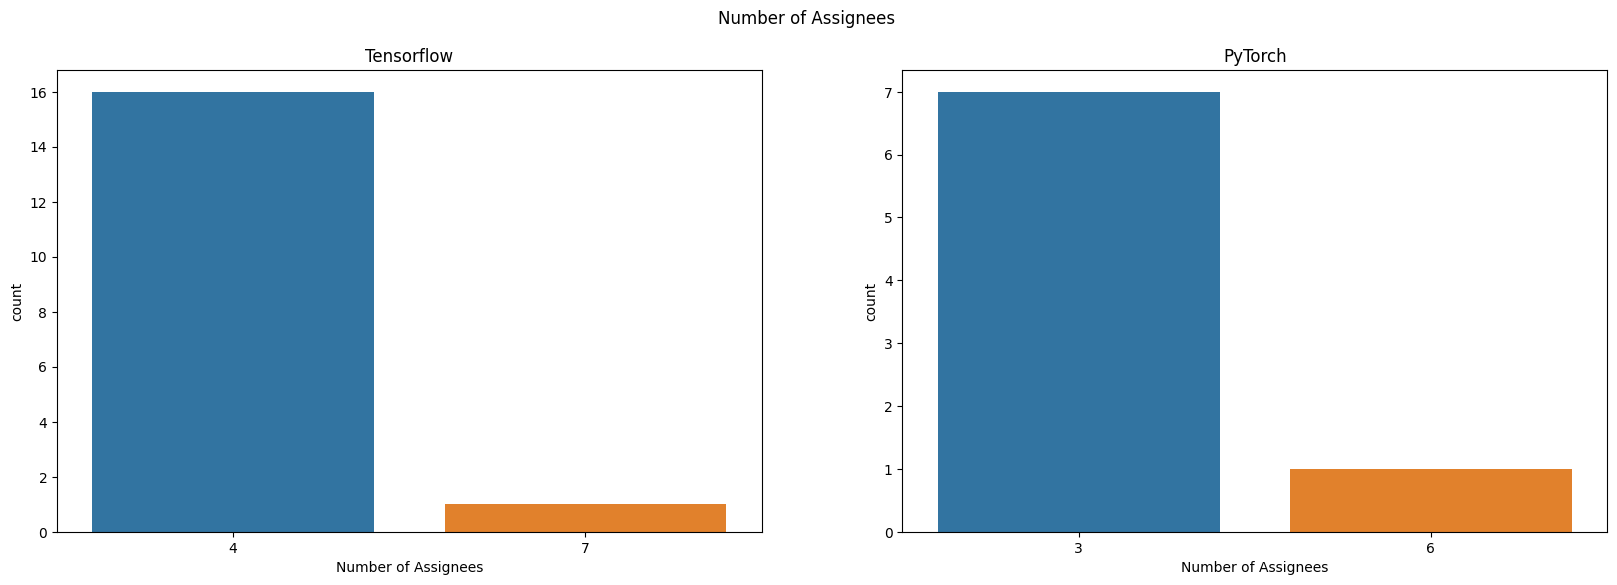

In [136]:
GeneratePlots(TF_df_outlier, PT_df_outlier, "Tensorflow", "PyTorch", "Number of Assignees")

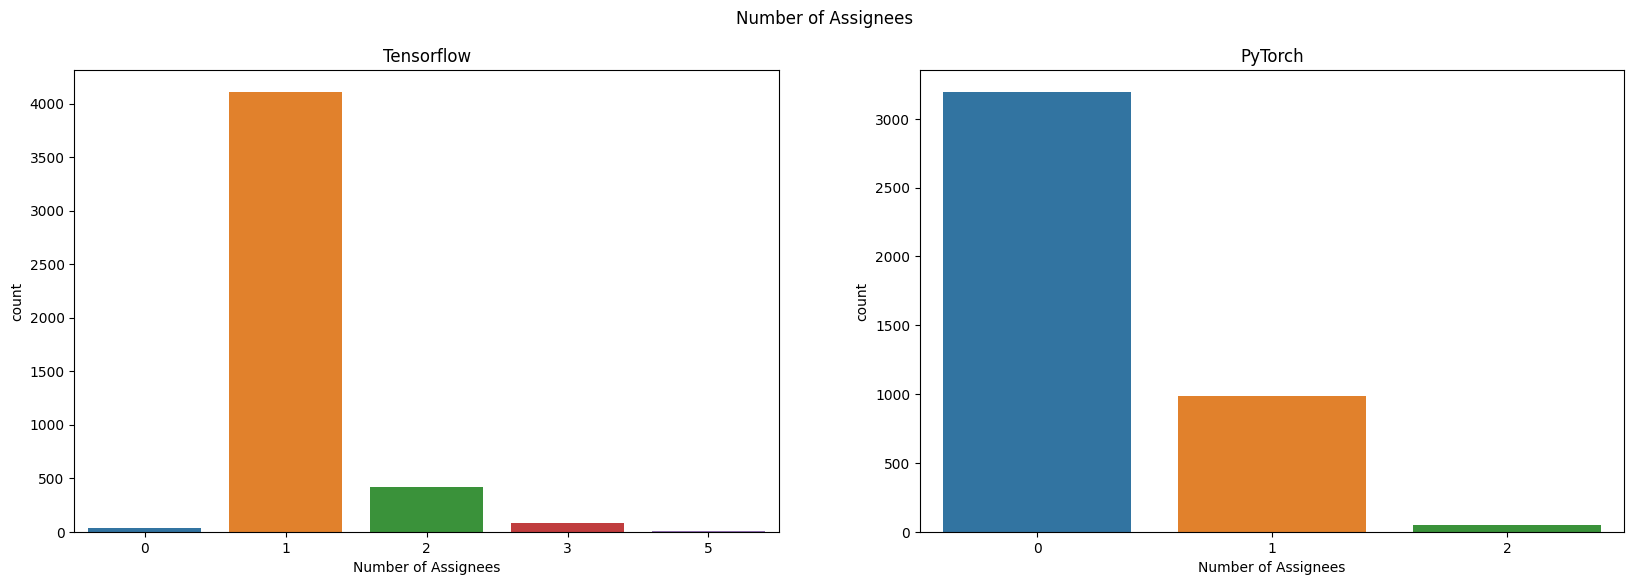

In [137]:
GeneratePlots(TF_df_inlier, PT_df_inlier, "Tensorflow", "PyTorch", "Number of Assignees")

  <h4><strong>Observation 2</strong></h4>

<p><strong>For the Inlier points</strong></p>
<ul>
<li>We can see that a very good proportion of closed issues in Pytorch Framework are not assigned to specific people, while the majority of TensorFlow issues to be closed are assigned to a specific people, at least.</li>
</ul>

<p><strong>For the Outlier points</strong></p>
<ul>
  <li>TensorFlow has more assigned people in a number of  closed issues compared to the pyTorch Framework's issues.</li>
</ul>

<p>From the <strong>analysis points </strong> above, this could indicate that Pytorch has a less formalized or centralized system for issue management, or fewer individuals responsible for handling issues compared to TensorFlow.</p>


### 3.1.3 Number of Comments

#### 3.1.3.1 Without Removing the Outlier 

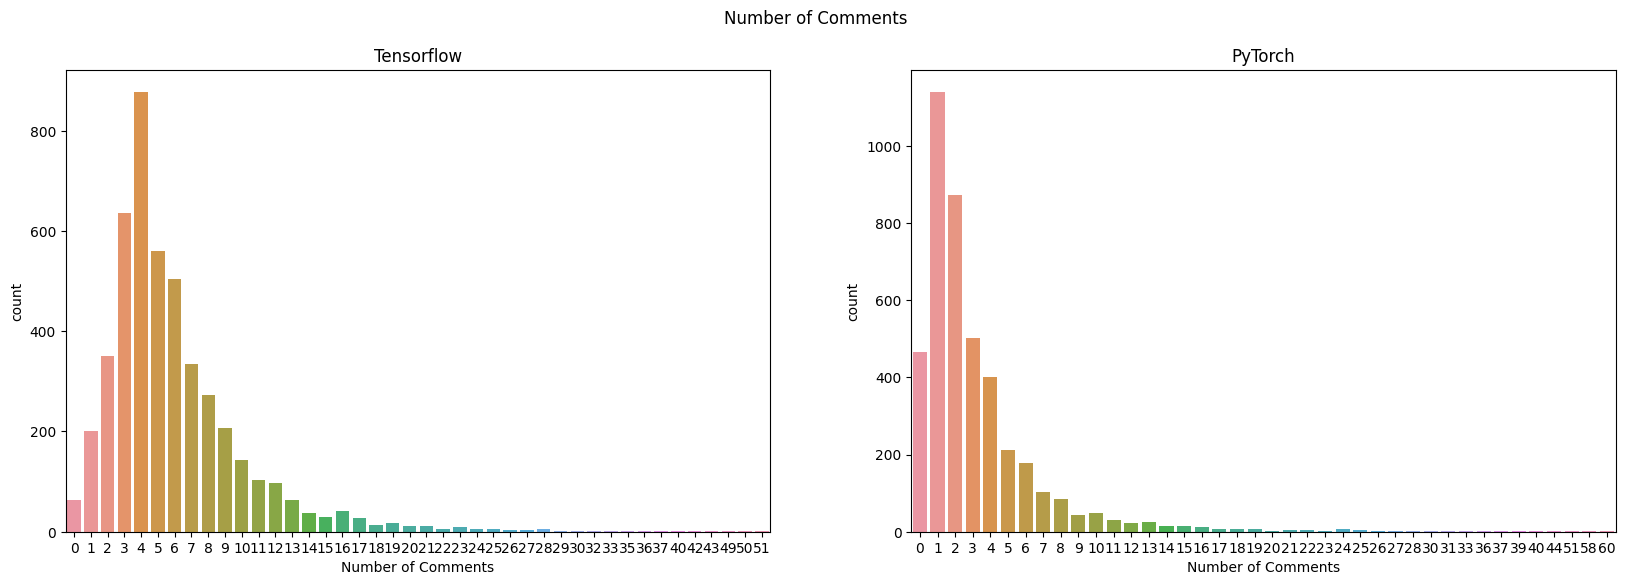

In [138]:
GeneratePlots(TF_df, PT_df, "Tensorflow", "PyTorch", "Number of Comments")

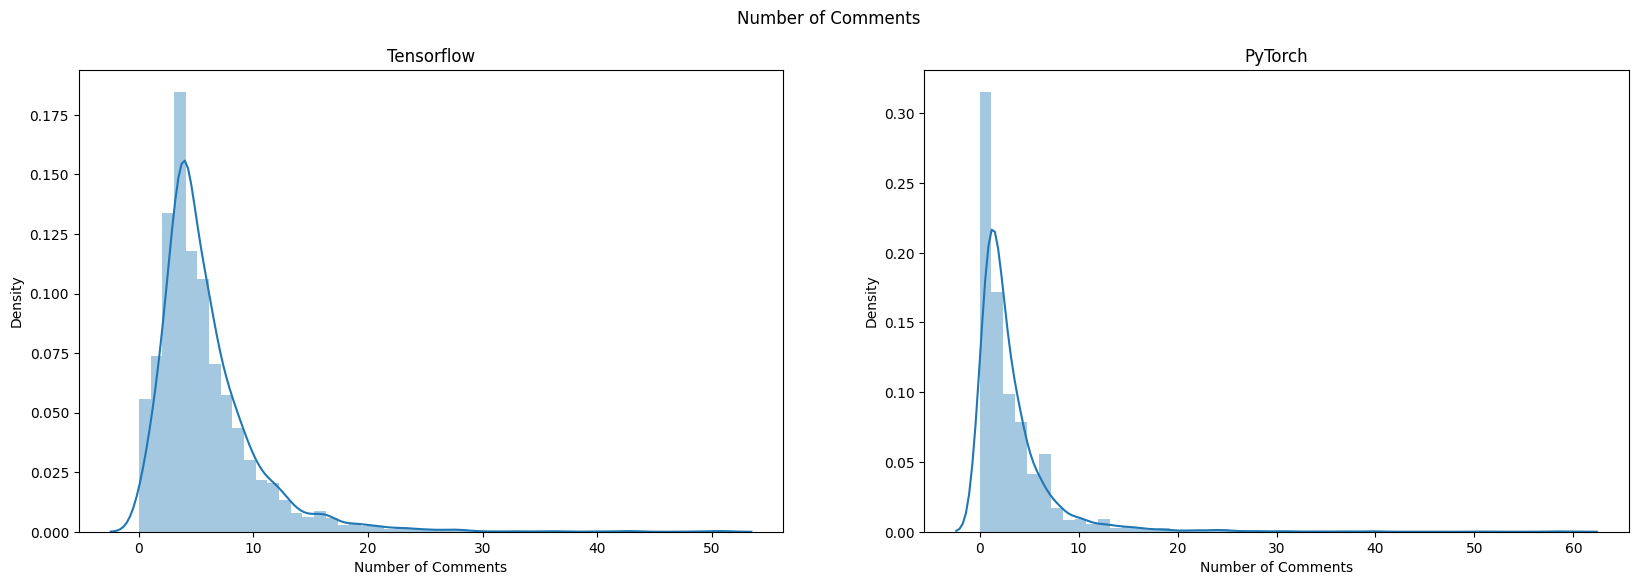

In [139]:
CompareDistributions(TF_df, PT_df, "Tensorflow", "PyTorch", "Number of Comments")

#### 3.1.3.2 Examining Outliers and Regular Data Points Independently

In [140]:
featureList = ['Number of Comments']
TF_df_inlier, TF_df_outlier = Outliners(TF_df, featureList)
PT_df_inlier, PT_df_outlier = Outliners(PT_df, featureList)

In [141]:
#Print the length of the outliners
print("The number of the outliners in", "TensorFlow", "is:", len(TF_df_outlier))
print("The number of the outliners in", "PyTorch", "is:", len(PT_df_outlier))

The number of the outliners in TensorFlow is: 65
The number of the outliners in PyTorch is: 67


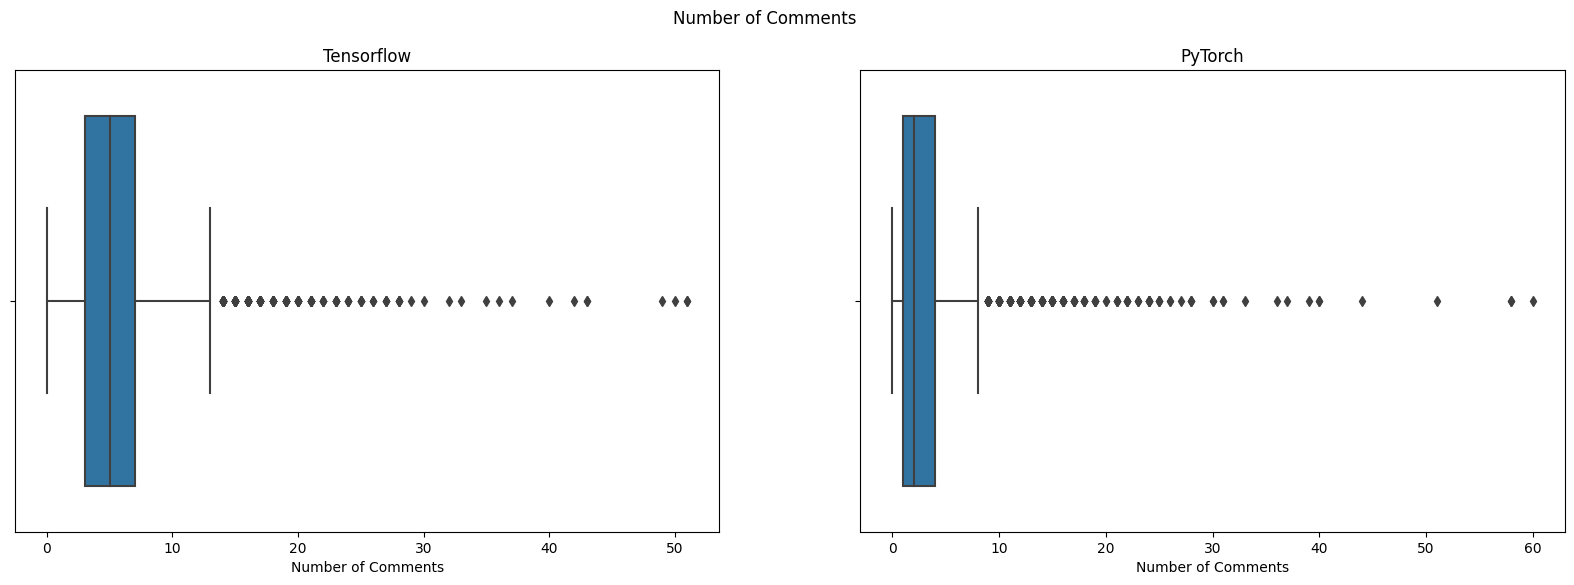

In [142]:
#boxplot for the number of comments
CheckOutliners(TF_df, PT_df, "Tensorflow", "PyTorch", "Number of Comments")

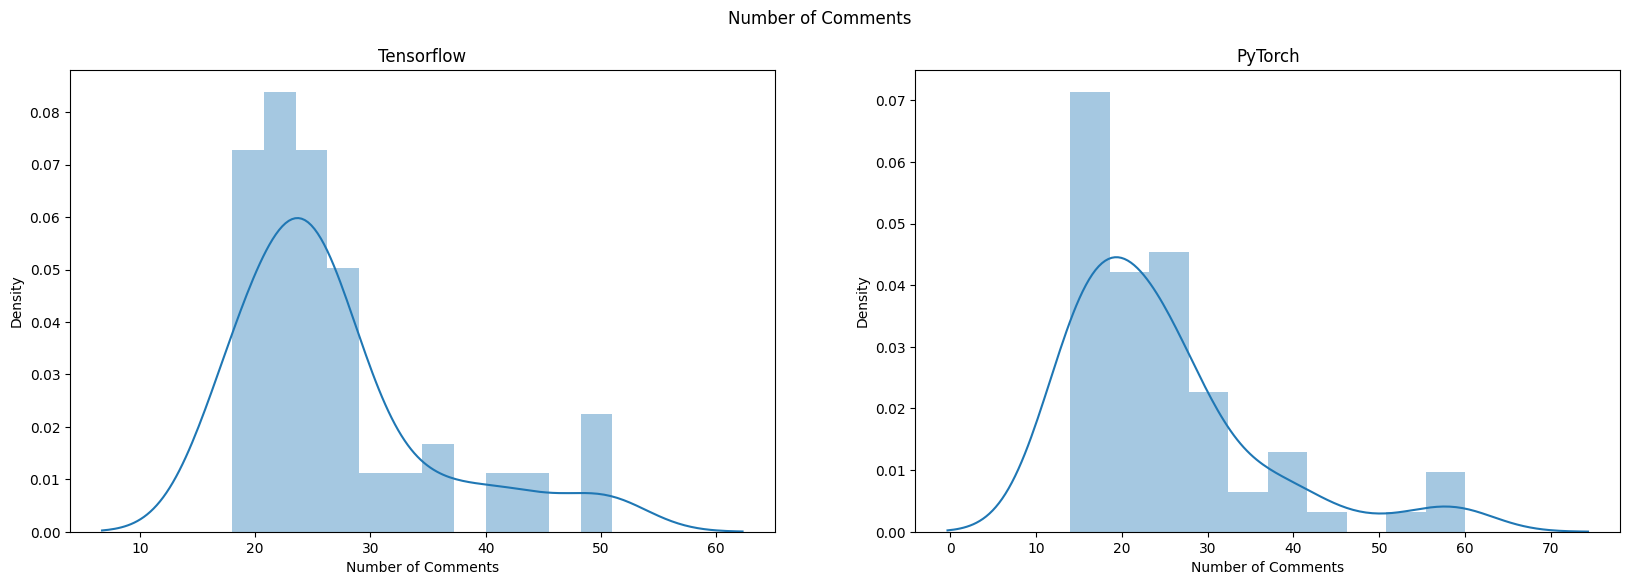

In [143]:
#LOF Outlier Detection for the Number of Comments
CompareDistributions(TF_df_outlier, PT_df_outlier, "Tensorflow", "PyTorch", "Number of Comments")

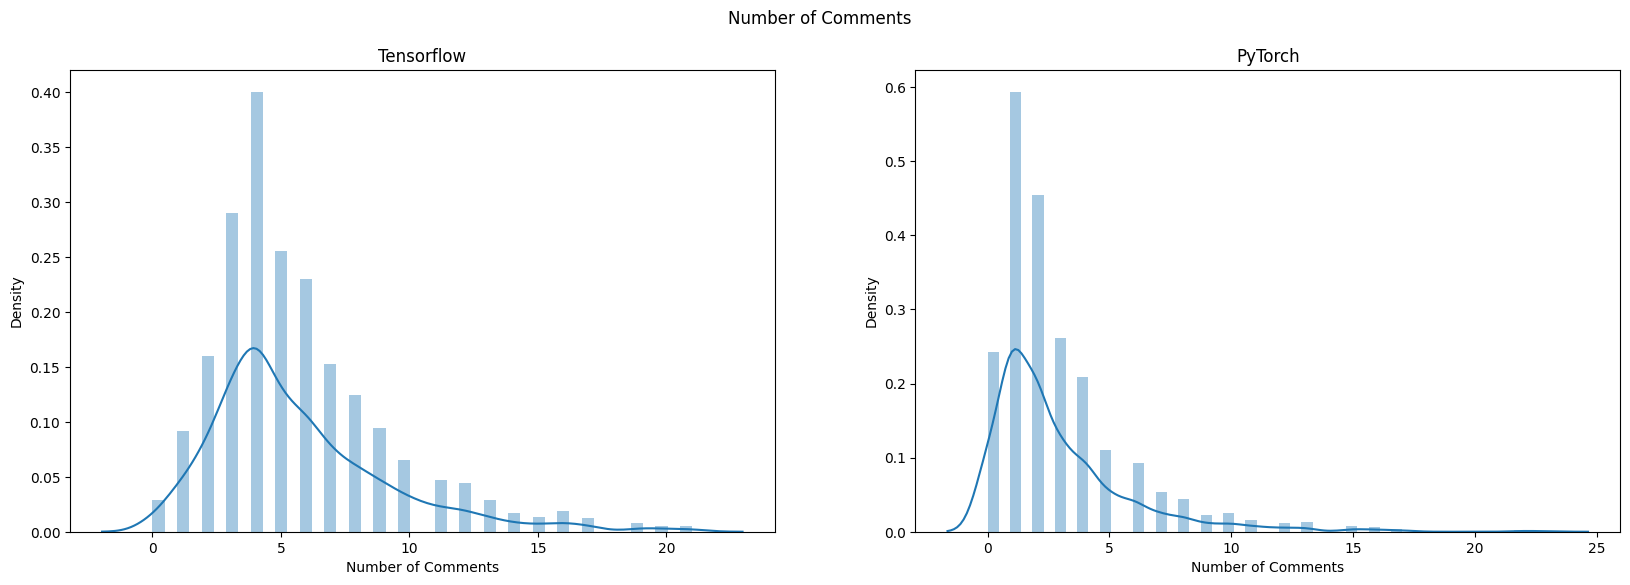

In [144]:
CompareDistributions(TF_df_inlier, PT_df_inlier, "Tensorflow", "PyTorch", "Number of Comments")

<h4><strong>Observation 3</strong></h4>

<p><strong>For the Inlier points</strong></p>
<ul>
<li>From our observation, we can see that the majority of issues for the PyTorch Framework have less (0-10) comments, while TensorFlow Framework has more comments (0-20).</li>
<li>Pytorch closed issues have greater number of zero comentsthan the tensorFlow closed issues. </li>
</ul>

<p><strong>For the Outlier points</strong></p>
<ul>
  <li>The distribution of the number of comments to the issues to be closed in the PyTorch Framework is to be shifted left, meaning that pyTorch has fewer comments in the majority of issues compared to the TensorFlow closed issues. </li>
</ul>

<p>From the <strong>analysis points </strong> above, this concludes the following:</p>
<ul>
  <li>* The closed issues that have less comments of PyTorch are more widely clssified compared to the closed issues of TensorFlow Framework. This aligns with the observation that the majority of issues in PyTorch are closed faster - solved within a day- which might indicate that PyTorch is more widely used.</li>
  <li>However, from time to close metric, TensorFlow seems to have a larger and more established community compared to PyTorch and Pytorch is growing at a fast pace and has a more active development community with frequent updates and new features being added. </li>
  <li>Another Possibility is that most of the issues to be closed in PyTorch are not necessary to be buggy compared to the tensorFlow's closed issues.</li>
  <li>The type of issues that have zero comments highlights that these issues are rarely to be encountered with many developers. </li>
</ul>


### 3.1.4 Number of Labels

#### 3.1.4.1 Without Removing Outliers

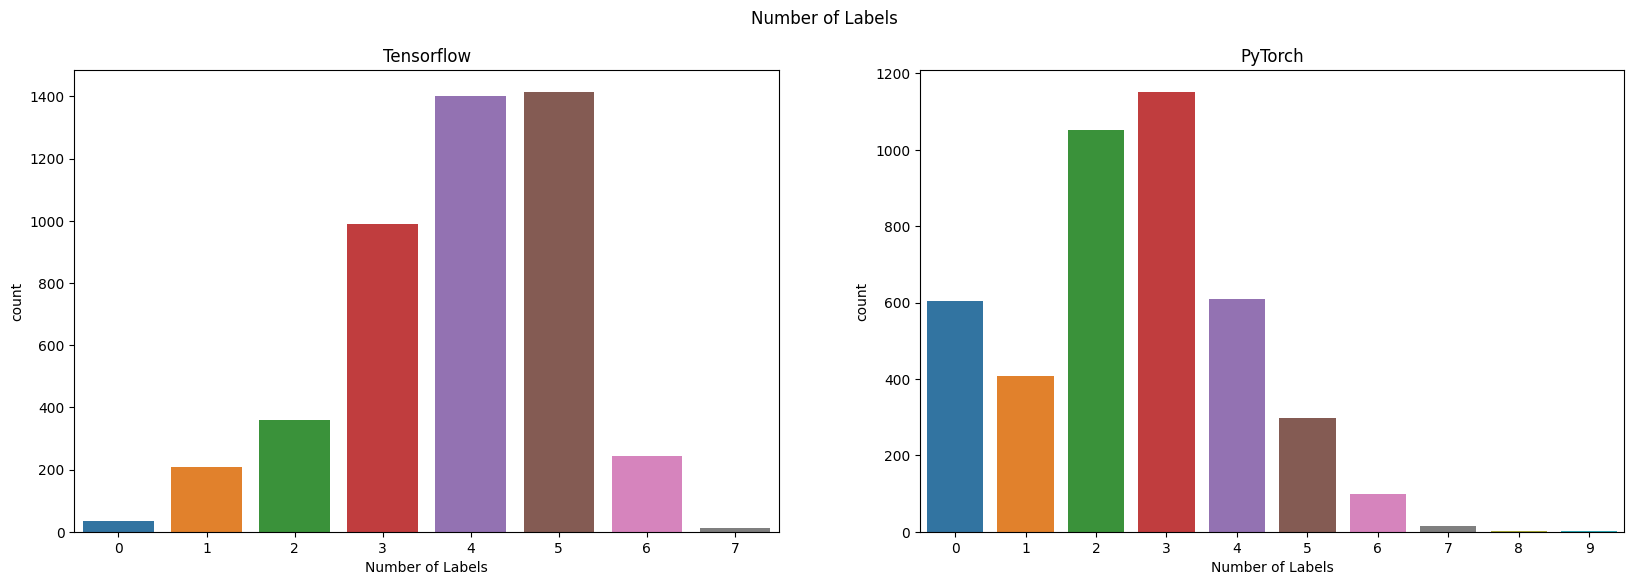

In [145]:
#Generate Plots with the number of labels
GeneratePlots(TF_df, PT_df, "Tensorflow", "PyTorch", "Number of Labels")

#### 3.1.4.2 Examining Outliers and Regular Data Points Independently

In [146]:
featureList = ['Number of Labels']
TF_df_inlier, TF_df_outlier = Outliners(TF_df, featureList)
PT_df_inlier, PT_df_outlier = Outliners(PT_df, featureList)

In [147]:
#print the length of the outliners
print("The number of the outliners in", "TensorFlow", "is:", len(TF_df_outlier))
print("The number of the outliners in", "PyTorch", "is:", len(PT_df_outlier))

The number of the outliners in TensorFlow is: 13
The number of the outliners in PyTorch is: 21


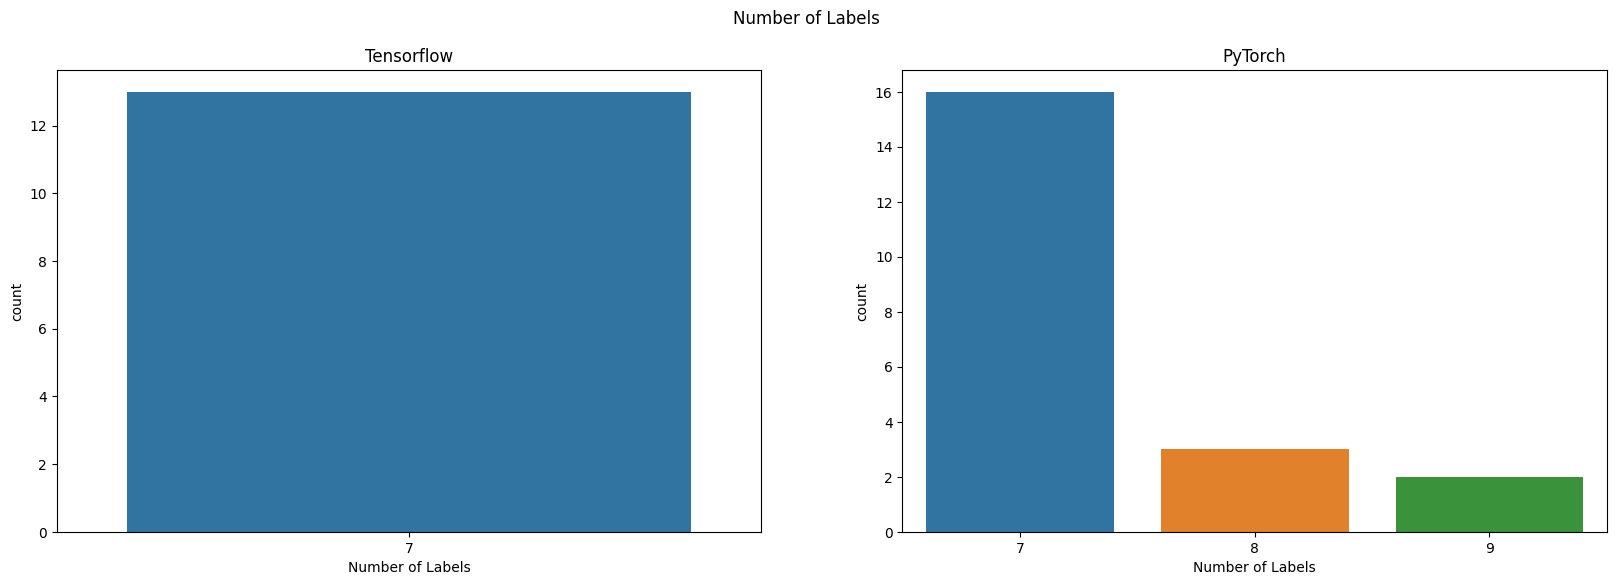

In [148]:
GeneratePlots(TF_df_outlier, PT_df_outlier, "Tensorflow", "PyTorch", "Number of Labels")

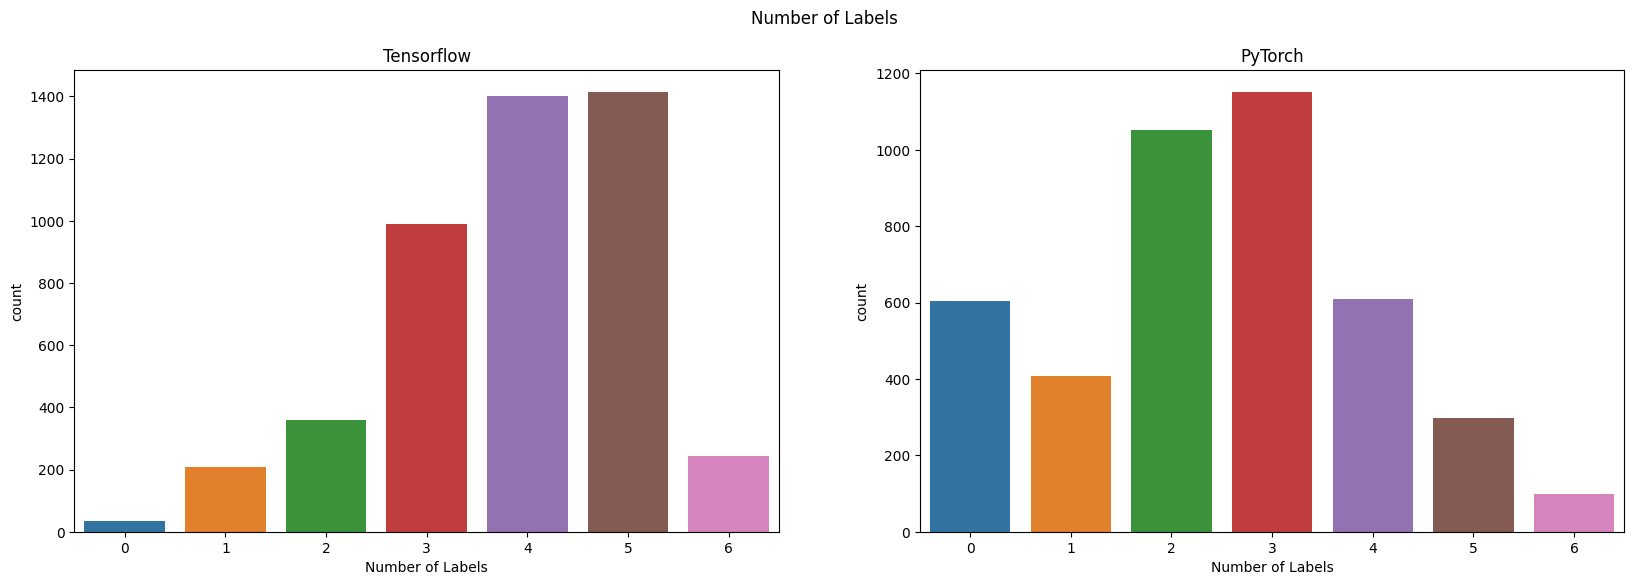

In [149]:
GeneratePlots(TF_df_inlier, PT_df_inlier, "Tensorflow", "PyTorch", "Number of Labels")

<h4><strong>Observation 4</strong></h4>

<p><strong>For the Inlier points</strong></p>
<ul>
<li>We can observe that the majority of closed issues for TensorFlow has more labels for each, while the majority of the PyTorch closed issues are categorized into less labels for each- This can be observed as the distribution for the TensorFlow dataset for this metric tends to the right more than that of PyTorch closed issues.</li>
</ul>

<p><strong>For the Outlier points</strong></p>
<ul>
  <li>Some small points elaborates that pyTorch are categorized to more labels.</li>
</ul>

<p>From the <strong>analysis points </strong> above, this concludes the following:</p>
<ul>
  <li>This might have an assumption that closed issues for TensorFlow tend to have more specific labels applied to them, while closed issues for PyTorch tend to have fewer. Comparing the type and priority should prove or disprove this hypothesis.</li>
</ul>




### 3.1.5 Issue Classification

#### 3.1.5.1 Type

##### 3.1.5.1.1 Without Removing Outliers

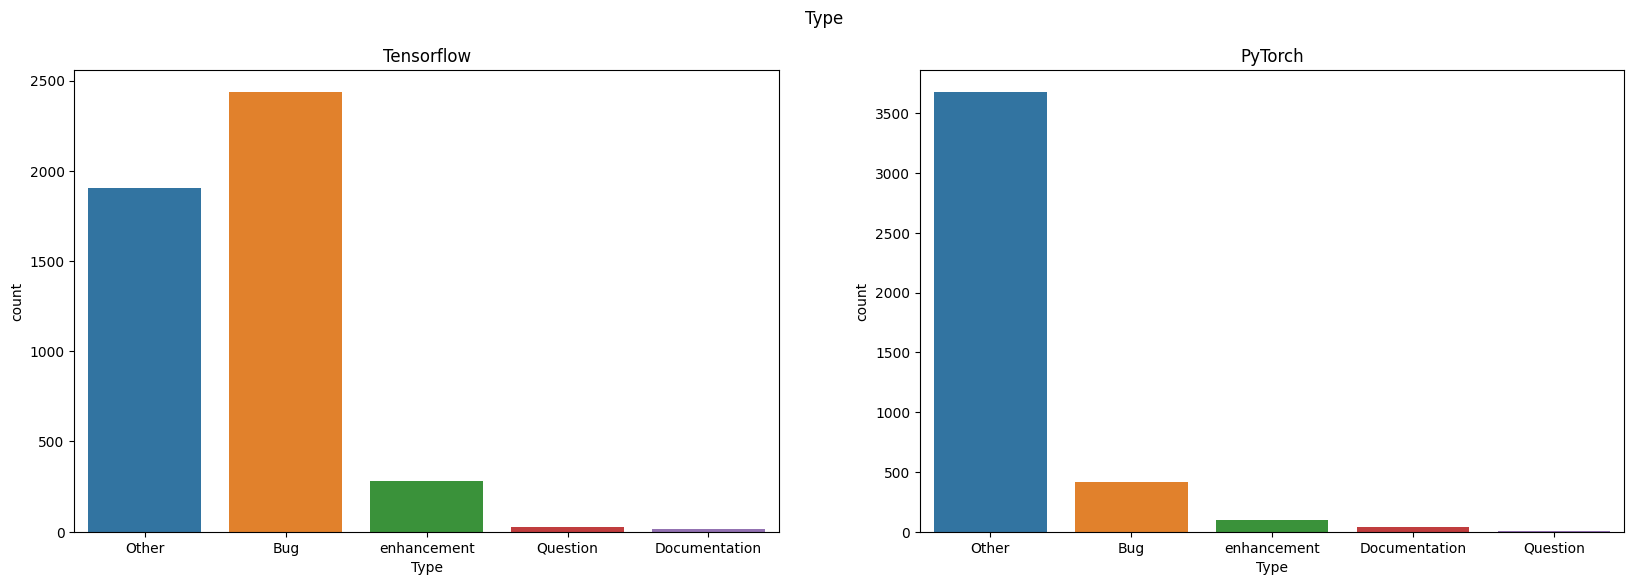

In [150]:
# Generate the plots for the Type feature and replacing the numbers with TypeMapper in the plot
def GeneratePlotsWithMapper(df1, df2, FrameWorkName1, FrameWorkName2, FeatureName, TypeMapper):
    '''
    Args: 
        df1: The Dataframe1
        df2: The Dataframe2
        FrameWorkName1: The name of the first framework
        FrameWorkName2: The name of the second framework
        FeatureName: The name of the feature that we want to compare between the two frameworks
        TypeMapper: The mapper that we want to use to map the numbers to the type
    Returns:
        None
    '''
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(FeatureName)
    axes[0].set_title(FrameWorkName1)
    axes[1].set_title(FrameWorkName2)
    df1_cpy = df1.copy()
    df1_cpy = df1_cpy.replace({FeatureName: TypeMapper})
    df2_cpy = df2.copy()
    df2_cpy = df2_cpy.replace({FeatureName: TypeMapper})
    sns.countplot(x=FeatureName, data=df1_cpy, ax=axes[0])
    sns.countplot(x=FeatureName, data=df2_cpy, ax=axes[1])
    



GeneratePlotsWithMapper(TF_df, PT_df, "Tensorflow", "PyTorch", "Type", TypeMapper)

##### 3.1.5.1.2 Examining Outliers and Regular Data Points Independently

In [151]:
featureList = ['Type']
TF_df_inlier, TF_df_outlier = Outliners(TF_df, featureList)
PT_df_inlier, PT_df_outlier = Outliners(PT_df, featureList)

In [152]:
#print the length of the outliners
print("The number of the outliners in", "TensorFlow", "is:", len(TF_df_outlier))
print("The number of the outliners in", "PyTorch", "is:", len(PT_df_outlier))

The number of the outliners in TensorFlow is: 13
The number of the outliners in PyTorch is: 5


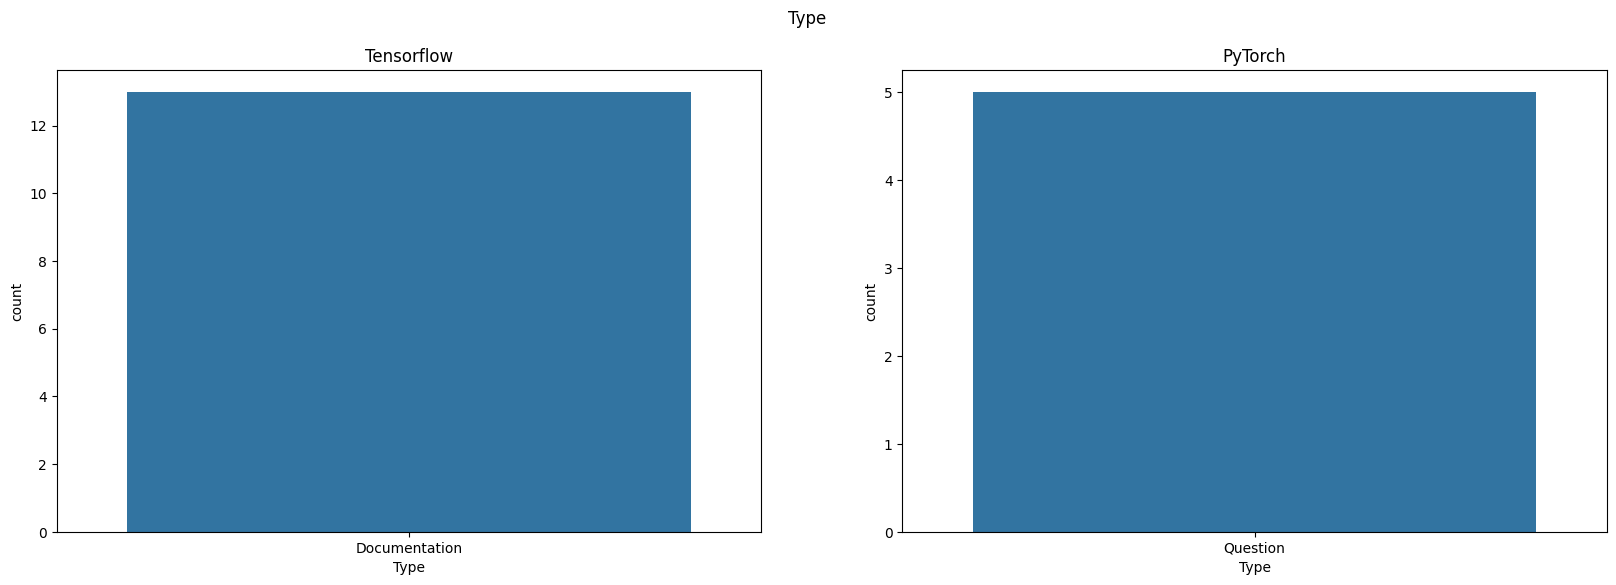

In [153]:
GeneratePlotsWithMapper(TF_df_outlier, PT_df_outlier, "Tensorflow", "PyTorch", "Type", TypeMapper)


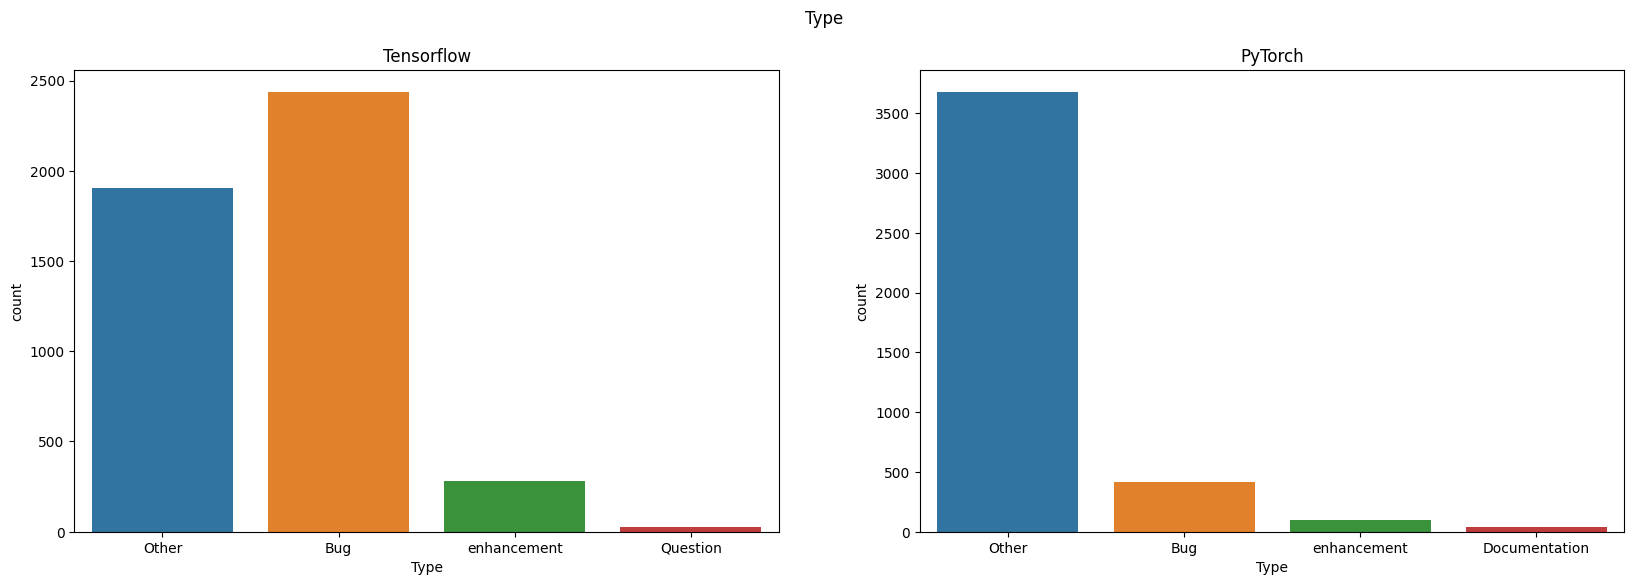

In [154]:
GeneratePlotsWithMapper(TF_df_inlier, PT_df_inlier, "Tensorflow", "PyTorch", "Type", TypeMapper)

<h4><strong>Observation 5</strong></h4>

<p><strong>For the Inlier points</strong></p>
<ul>
<li>It is commonly observed that a significant proportion of closed issues reported in the TensorFlow framework pertain to bugs. </li>
</ul>

<p><strong>For the Outlier points</strong></p>
<ul>
  <li>It does not show any interesting information</li>
</ul>

<p>From the <strong>analysis points </strong> above, this concludes the following:</p>
<ul>
  <li>it would be inaccurate to infer that the implementation of TensorFlow is inherently more prone to bugs than PyTorch. One potential explanation for the high number of bug-related issues in TensorFlow could be its extensive array of tools and libraries. These additional functionalities may increase the potential for bugs to arise.</li>
  <li> By analyzing the number of comments, time to close, and number of assignees, it is apparent that TensorFlow has a substantial community of developers who actively contribute to the maintenance and development of the framework. This large developer community is likely to result in a higher number of bugs being reported and subsequently addressed.</li>
</ul>


<p>In <strong>conclusion</strong>, the number of bug-related issues reported in the TensorFlow framework may be attributed to the framework's extensive feature set and active developer community, rather than indicating that its codebase is inherently more prone to bugs than PyTorch.</p>



#### 3.1.5.2 Priority

##### 3.1.5.2.1 Without Removing Outliers

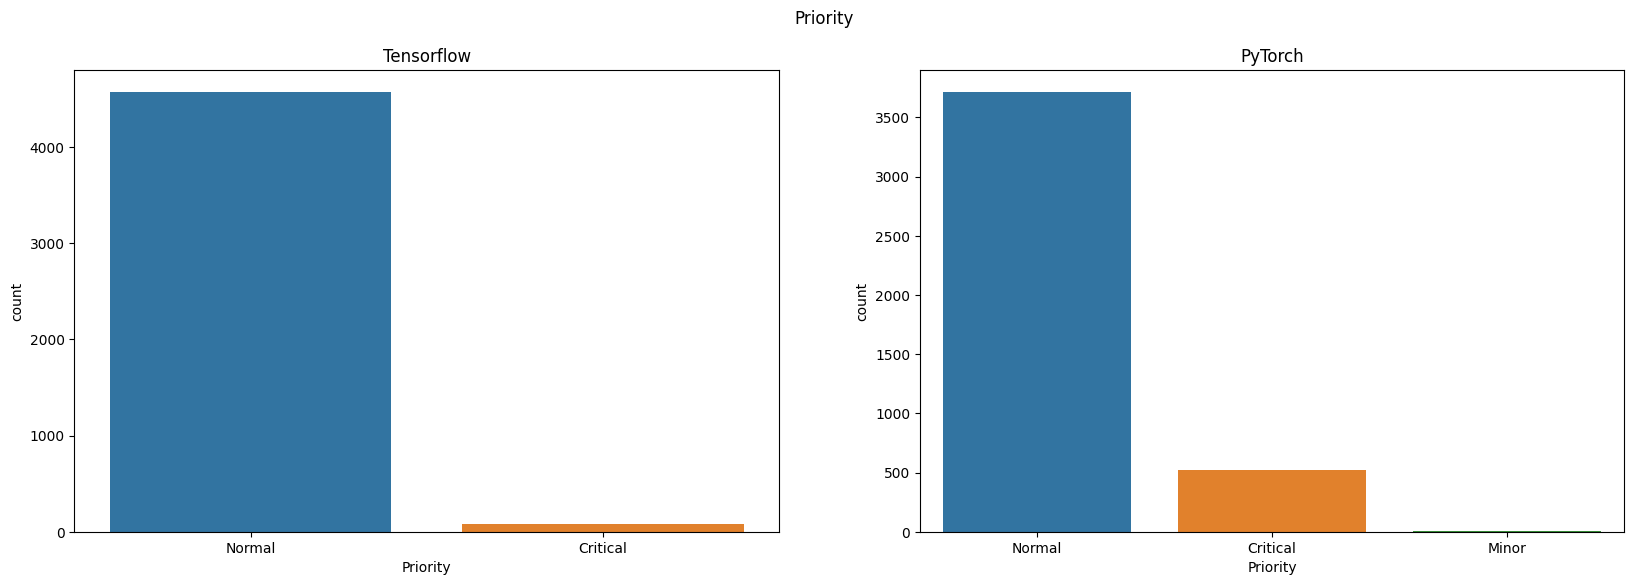

In [155]:
GeneratePlotsWithMapper(TF_df, PT_df, "Tensorflow", "PyTorch", "Priority", PriorityMapper)

In [156]:
# The number of the issues that are critical in Tensorflow and PyTorch
print("The number of the issues that are critical in", "Tensorflow", "is:", len(TF_df[TF_df["Priority"] == 2]))
print("The number of the issues that are critical in", "PyTorch", "is:", len(PT_df[PT_df["Priority"] == 2]))

The number of the issues that are critical in Tensorflow is: 85
The number of the issues that are critical in PyTorch is: 522


##### 3.1.5.2.2 Examining Outliers and Regular Data Points Independently

In [157]:
featureList = ['Priority']
TF_df_inlier, TF_df_outlier = Outliners(TF_df, featureList)
PT_df_inlier, PT_df_outlier = Outliners(PT_df, featureList)

In [158]:
#print the length of the outliners
print("The number of the outliners in", "TensorFlow", "is:", len(TF_df_outlier))
print("The number of the outliners in", "PyTorch", "is:", len(PT_df_outlier))

The number of the outliners in TensorFlow is: 0
The number of the outliners in PyTorch is: 4


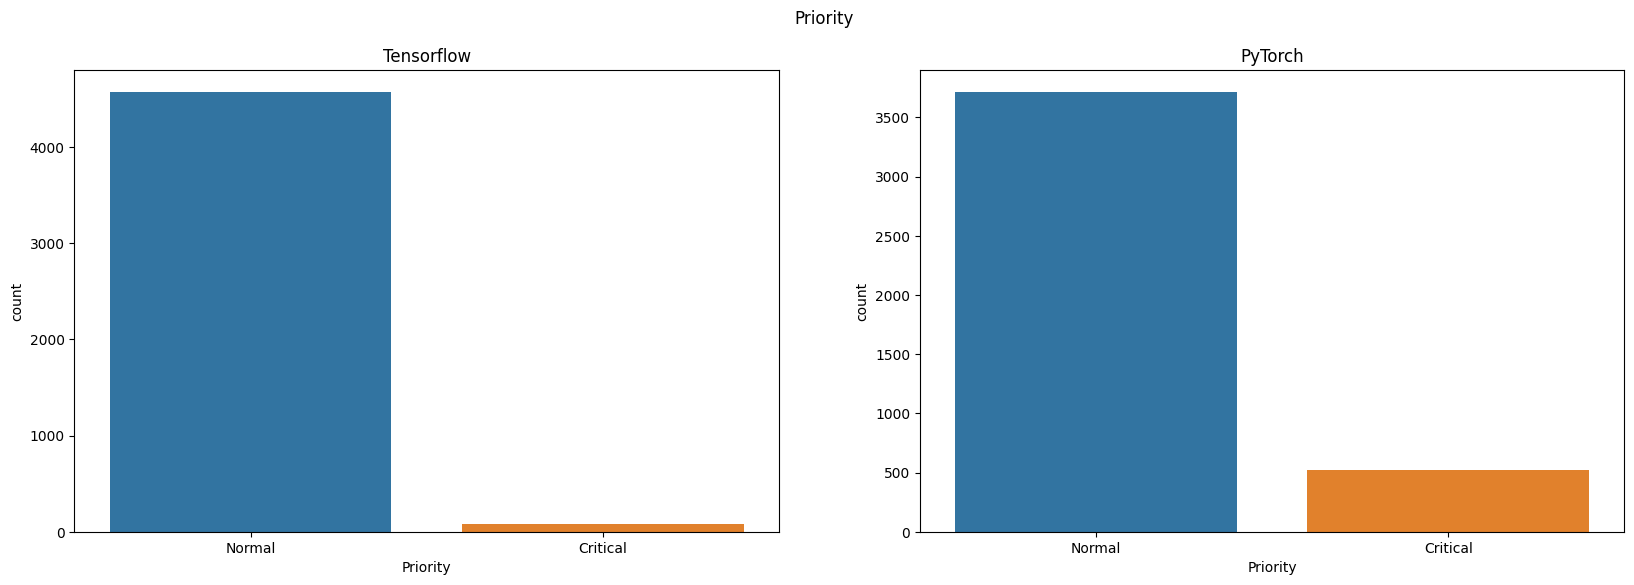

In [159]:
GeneratePlotsWithMapper(TF_df_inlier, PT_df_inlier, "Tensorflow", "PyTorch", "Priority", PriorityMapper)

<h4><strong>Observation 6</strong></h4>

<p><strong>For the Inlier points</strong></p>
<ul>
<li>We can observe that the majority of closed issues of PyTorch Framework have more critical issues compared to the other Framework, TensorFlow.</li>
</ul>

<p><strong>For the Outlier points</strong></p>
<ul>
  <li>It does not show any interesting information</li>
</ul>

<p>From the <strong>analysis points </strong> above, this concludes the following:</p>
<ul>
  <li> Although most of the closed issues of TensorFlow were buggy, it does not mean that there were critical.</li>
</ul>



##### 3.1.5.2.3 Check the variance of the Priority
<p>From the histogram, it seems the variance is not good.</p>

In [160]:
def CheckColumnVariance(df1, df2, FrameWorkName1, FrameWorkName2, FeatureName):
    '''
    Args: 
        df1: The Dataframe1
        df2: The Dataframe2
        FrameWorkName1: The name of the first framework
        FrameWorkName2: The name of the second framework
        FeatureName: The name of the feature that we want to compare between the two frameworks
    Returns:
        None
    '''
    print("The variance of", FeatureName, "in", FrameWorkName1, "is:", df1[FeatureName].var())
    print("The variance of", FeatureName, "in", FrameWorkName2, "is:", df2[FeatureName].var())

CheckColumnVariance(TF_df, PT_df, "Tensorflow", "PyTorch", "Priority")

The variance of Priority in Tensorflow is: 0.07164590754707074
The variance of Priority in PyTorch is: 0.43214266546347574


<p> We can notice that The Variance of Priority in TensorFlow is less than 0.1, as a feature with low variance means that the values in that column are mostly the same, which means that it is unlikely to contain useful information that can help predict the outcome of the model. Therefore, we cannot rely on observation number 7. I tested the other columns and they have good variance to be analyzed</p>

<h4><strong>Conclusion</strong></h4>
<p>From the 7 observations above, we can conclude the following:</p>
<ol>
<li>TensorFlow seems to have a larger and more established community compared to PyTorch. It has a substantial community of developers who actively contribute to the maintenance and development of the framework. This large developer community is likely to result in a higher number of bugs being reported and subsequently addressed.</li>
<li>TensorFlow could be its extensive array of tools and libraries.</li>
<li>>PyTorch's closed issues with fewer comments are more broadly categorized compared to TensorFlow's closed issues. This is in line with the fact that the majority of PyTorch issues are resolved more quickly, often within a day.</li>
<li>PyTorch are more straightforward to understand and resolve, or that the PyTorch community prioritizes brevity in their discussions and solutions.</li> 
<li>Due to the lack number of assignees in the majority of closed issues in PyTorch framework, It could mean that the Pytorch community is less organized in terms of assigning individuals or teams to specific issues, or it could indicate that the Pytorch project has fewer contributors overall. It could also mean that the issues in Pytorch are less complex and do not require specific assignee to solve them, or that the Pytorch developers prefer to handle issues internally within the development team. Without more information, it's difficult to say for sure what the reason behind this difference is.</li>

</ol>

### 3.2 Understanding the Correlation between Metrics

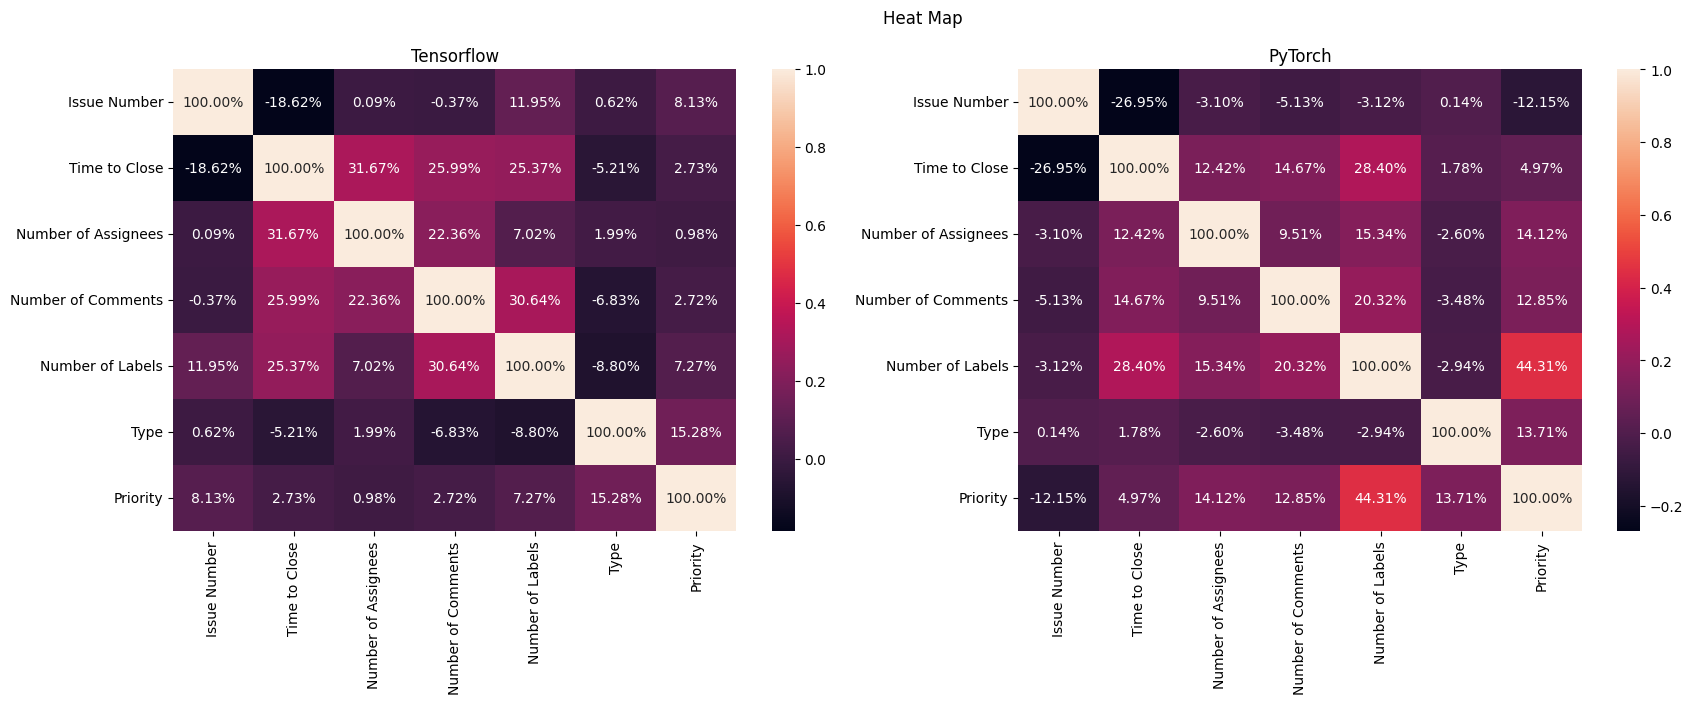

In [161]:
#check the heat map for both dataframes beside each other highlighting the correlation between the features with a percentage
def HeatMap(df1, df2, FrameWorkName1, FrameWorkName2):
    '''
    Args: 
        df1: The Dataframe1
        df2: The Dataframe2
        FrameWorkName1: The name of the first framework
        FrameWorkName2: The name of the second framework
    Returns:
        None
    '''
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle("Heat Map")
    axes[0].set_title(FrameWorkName1)
    axes[1].set_title(FrameWorkName2)
    sns.heatmap(df1.corr(), annot=True, fmt=".2%", ax=axes[0])
    sns.heatmap(df2.corr(), annot=True, fmt=".2%", ax=axes[1])

HeatMap(TF_df, PT_df, "Tensorflow", "PyTorch")

<h4><strong>Observation 7</strong></h4>
<p>It's important to note that correlation does not imply causation, and more research would be needed to understand the underlying causes of the following relationships.</p>
<lo>
<li>The correlation between Number of Labels and Time to Close in both datasets is somehow fair. This suggests that issues with more labels might be more complex or have more components to them, leading to a longer resolution time. </li></lo>
<p>There is not strong correlation between other labels according to the Two Framework issues</p>


## 4. Clustering for Topic Modeling

In [162]:
from sklearn.cluster import MeanShift, KMeans, AffinityPropagation, SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from wordcloud import WordCloud, STOPWORDS

#Elbow Method with an input dataFrame 
def elbow_scorer(dataframe, lowRange , highRange, title):
    elbow_scores = []
    for i in range(lowRange, highRange):
        m1=KMeans(n_clusters=i, random_state=42)
        c = m1.fit_predict(dataframe)
        elbow_scores.append(m1.inertia_) 
    plt.plot(range(lowRange,highRange), elbow_scores, color='red', marker='o') 
    plt.xlabel(title, fontsize = 20) 
    plt.ylabel('S(i)', fontsize = 20) 
    plt.show()
    return elbow_scores

def silhouette_scorer(dataframe, lowRange, highRange, title):
    silhouette_scores = []
    for i in range(lowRange, highRange):
        m1=KMeans(n_clusters=i, random_state=42)
        c = m1.fit_predict(dataframe)
        silhouette_scores.append(silhouette_score(dataframe, m1.fit_predict(dataframe))) 
    plt.bar(range(2,10), silhouette_scores) 
    plt.xlabel(title, fontsize = 20) 
    plt.ylabel('S(i)', fontsize = 20) 
    plt.show()
    return silhouette_scores

def makeWordCloud(df_, clustersNum):
    '''
    Args:
        df_: The dataframe
        clustersNum: The number of the cluster
    Returns:
        None
    '''
    text3 = ' '.join(df_[df_['cluster']==clustersNum]['preprocessed Title'])
    wordcloud2 = WordCloud().generate(text3)
    # Generate plot
    plt.imshow(wordcloud2)
    plt.axis("off")
    plt.show()


def kmeansDF(nClusters, dataframe): 
    kmeans = KMeans(n_clusters=nClusters, random_state=42)
    c = kmeans.fit_predict(dataframe)
    return c

### 4.1 Analysis using wordEmbedding vectors

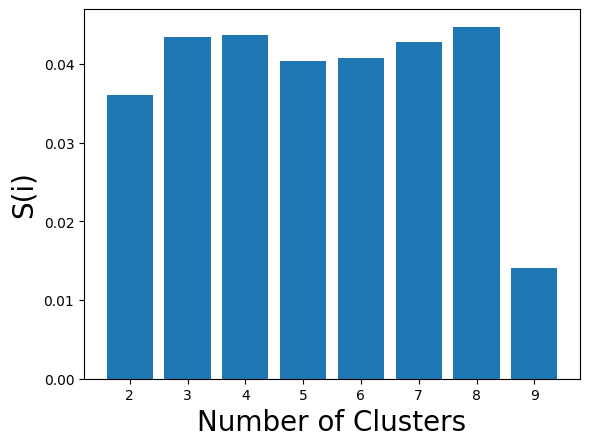

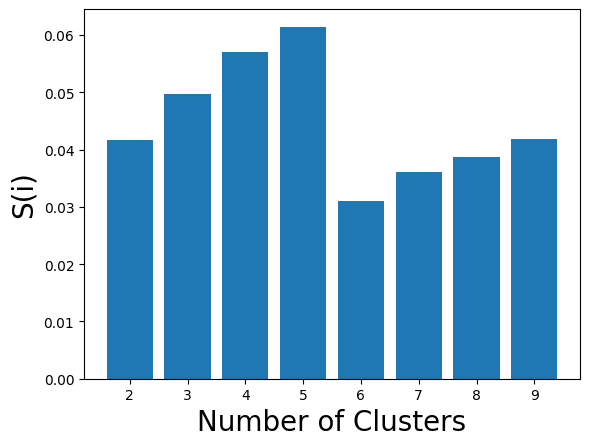

In [163]:
#TensorFlow
TF_SilhouetteScores = silhouette_scorer(TF_Issue_Title_Embedding, 2, 10, "Number of Clusters")
#PyTorch
PT_SilhouetteScores = silhouette_scorer(PT_Issue_Title_Embedding, 2, 10, "Number of Clusters")

<p> We can see from above that the silhouette score for both is nearly zero. I will try with BM25. </p>

### 4.2 Analysis using BM25 vectors

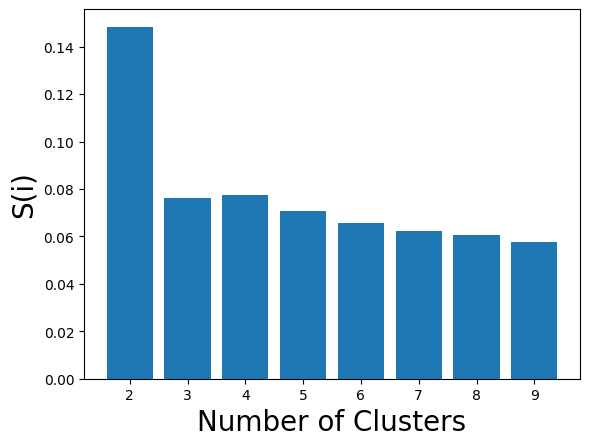

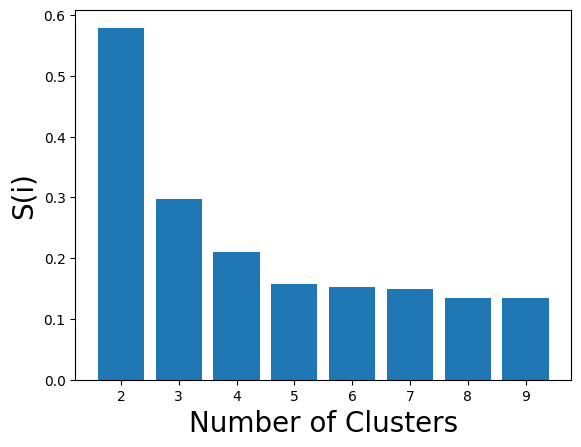

In [164]:
#TensorFlow
TF_SilhouetteScores = silhouette_scorer(TF_BM25, 2, 10, "Number of Clusters")

#PyTorch
PT_SilhouetteScores = silhouette_scorer(PT_BM25, 2, 10, "Number of Clusters")

In [165]:
# Get the number of zeros in each vector in the list TF_BM25 and PT_BM25
TF_ZeroCount = [np.count_nonzero(i) for i in TF_BM25]
PT_ZeroCount = [np.count_nonzero(i) for i in PT_BM25]

#Sum of the zeros in each vector
TF_ZeroSum = sum(TF_ZeroCount)
PT_ZeroSum = sum(PT_ZeroCount)

#Total number of vectors
TF_TotalVectors = len(TF_BM25) * len(TF_BM25[0])
PT_TotalVectors = len(PT_BM25) * len(PT_BM25[0])

#Average number of zeros in each vector

TF_AvgZero = TF_ZeroSum/TF_TotalVectors
PT_AvgZero = PT_ZeroSum/PT_TotalVectors

#print 
print("TF_AvgZero: ", TF_AvgZero)
print("PT_AvgZero: ", PT_AvgZero)

TF_AvgZero:  0.2057403433476395
PT_AvgZero:  0.17447044664489889


<p> Silhouette Scorer for the Issue Title in TensorFlow Framework has less meaningful semantics compared to closed issue Title of PyTorch Framework. On Average The number of zeros average is nearly 20% of the whole data in TensorFlow Framework. We can do PCA and see what will happen </p>

#### 4.2.1 Insights for the common words in the Cluster using KMeans

In [166]:
from sklearn.decomposition import PCA
#DO PCA to reduce the dimensionality of the data
def PCA_(data, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(data)
    return pca.transform(data)

#Get the PCA for TF_BM25 and PT_BM25
TF_PCA = PCA_(TF_BM25, 20)
PT_PCA = PCA_(PT_BM25, 20)

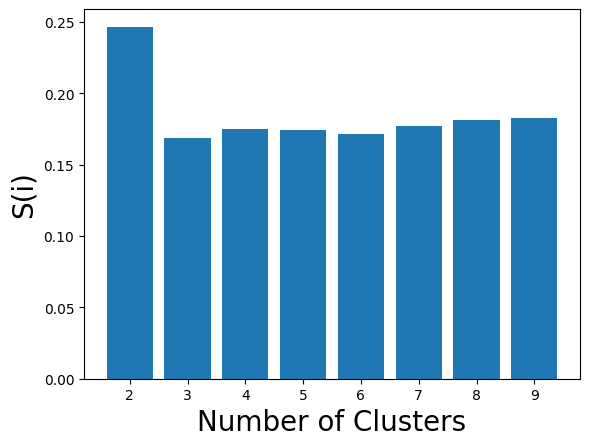

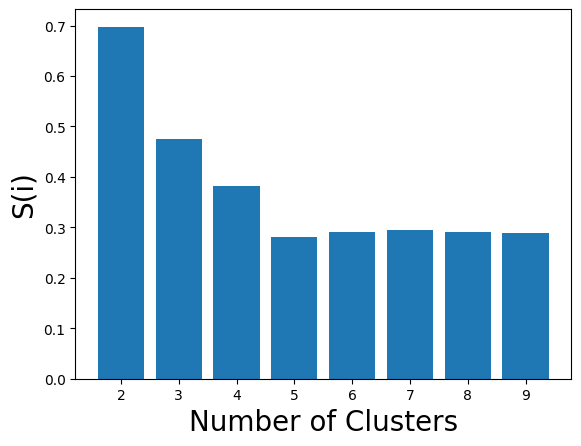

In [167]:
#Silhouette Scores for TF_BM25 and PT_BM25
TF_SilhouetteScores = silhouette_scorer(TF_PCA, 2, 10, "Number of Clusters")
PT_SilhouetteScores = silhouette_scorer(PT_PCA, 2, 10, "Number of Clusters")

<p> After conducting experiments with varying values of PCA (200, 100, etc.), it was observed that there were distinct clusters present in the issue titles of the PyTorch framework. However, the issue titles in the TensorFlow framework did not show clear separations and appeared to overlap with each other. </p>

<p>This result raises questions about the nature of issues in the TensorFlow framework. Is it because the bugs in TensorFlow are less critical, causing longer discussions as the questions are unclear? Or is there a particular tool in TensorFlow that is prone to being buggy? Further analysis is required by examining the content of the issues and messages to provide a more accurate understanding.</p>

<p>Although the Silhouette Score is somehow better if done some techniques, we could not conclude the types of issues in terms of context from the title. Further Analysis needed on the content of comments and the issue content.  </p>


In [168]:
#KMeans Clustering for TF_BM25 and PT_BM25
TF_KMeans = KMeans(n_clusters=2, random_state=0).fit(TF_PCA)
PT_KMeans = KMeans(n_clusters=2, random_state=0).fit(PT_PCA)

In [174]:
TF_df['cluster']=TF_KMeans.labels_
PT_df['cluster']=PT_KMeans.labels_

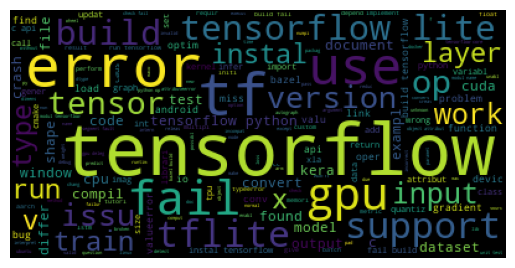

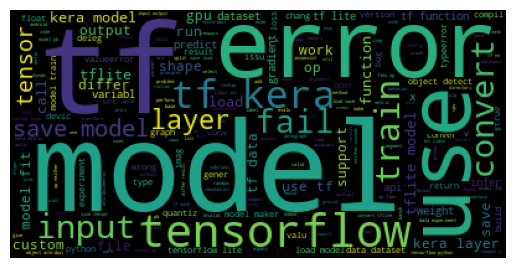

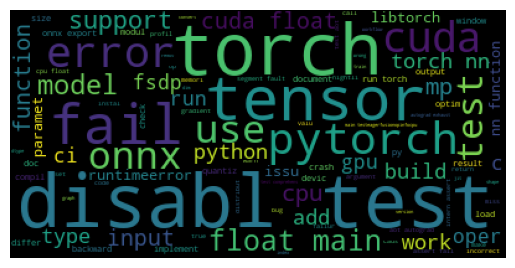

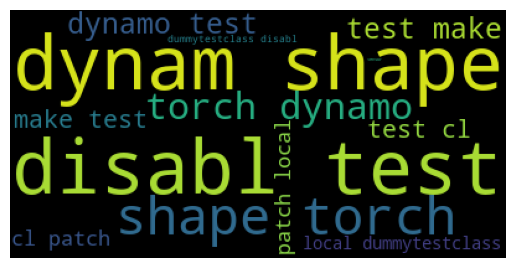

In [184]:
makeWordCloud(TF_df, 0)
makeWordCloud(TF_df, 1)
makeWordCloud(PT_df, 0)
makeWordCloud(PT_df, 1)

In [185]:
#### 4.2.2 Insights for the common words in the Cluster using BScan

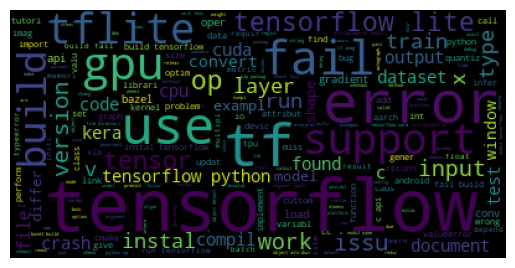

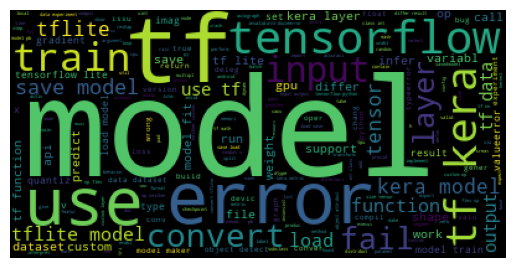

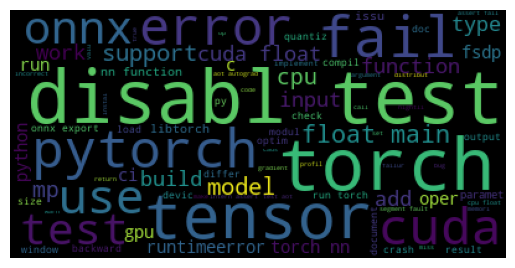

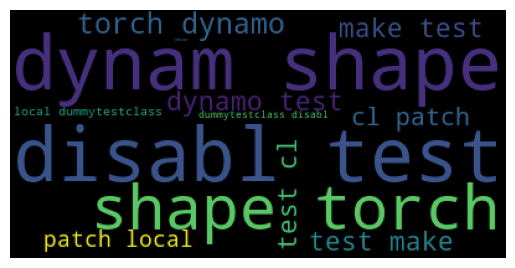

In [183]:
#Using DBSCAN to cluster the data
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#Standardize the data
scaler = StandardScaler()
TF_PCA_Scaled = scaler.fit_transform(TF_PCA)
PT_PCA_Scaled = scaler.fit_transform(PT_PCA)


makeWordCloud(TF_df, 0)
makeWordCloud(TF_df, 1)

makeWordCloud(PT_df, 0)
makeWordCloud(PT_df, 1)

<p><strong> Insights on Text Mining of Issues Titles: Topic Modeling </strong></p>
<ul>
<li>TensorFlow has two clusters in its issues titles. The first cluster focuses on general errors, building issues, and GPU-related issues. The second cluster discusses issues and errors related to the model.</li>
<li>PyTorch also has two clusters in its issues titles. The first cluster focuses on GPU-related issues, general errors, and building issues. The second cluster deals with issues related to make test and disabling torch dynamo.</li>
</ul>